In [67]:
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
from shapely.geometry import LineString
from shapely.geometry import Point
from shapely.geometry import Polygon

ox.__version__

'1.9.3'

In [68]:
# configure the place, network type, trip times, and travel speed
place = {"city": "Freiburg", "state": "Baden Württemberg"}
network_type = "walk"
trip_times = [5, 10, 15, 20, 25,30]  # in minutes
travel_speed = 3  # walking speed in km/hour

In [69]:
# download the street network
G = ox.graph_from_place(place, network_type=network_type)
Buildings=ox.graph_from_place(place, network_type=network_type)

In [70]:
schule_wa = ox.distance.nearest_nodes(G, 8, 48)

In [71]:
# find the centermost node and then project the graph to UTM
gdf_nodes = ox.graph_to_gdfs(G, edges=False)
x, y = gdf_nodes["geometry"].unary_union.centroid.xy
center_node = ox.distance.nearest_nodes(G, x[0], y[0])
#G = ox.project_graph(G)

In [72]:
# add an edge attribute for time in minutes required to traverse each edge
meters_per_minute = travel_speed * 1000 / 60  # km per hour to m per minute
for _, _, _, data in G.edges(data=True, keys=True):
    data["time"] = data["length"] / meters_per_minute

In [73]:
# get one color for each isochrone
iso_colors = ox.plot.get_colors(n=len(trip_times), cmap="plasma", start=0)

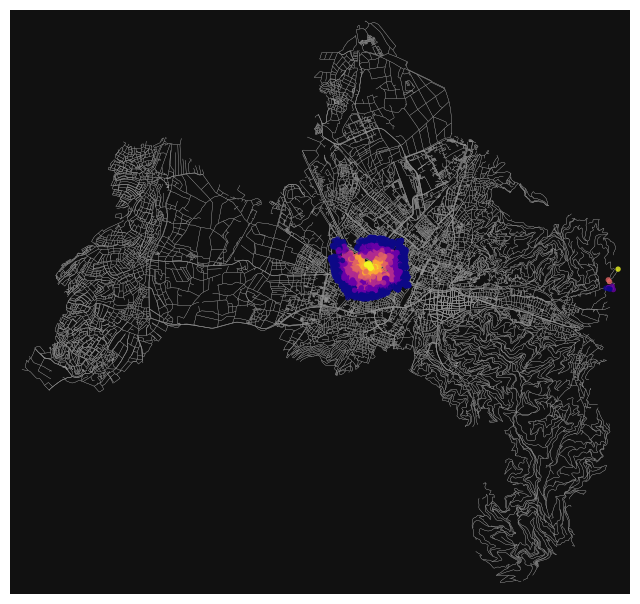

In [74]:
# color the nodes according to isochrone then plot the street network
node_colors = {}
for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
    subgraph = nx.ego_graph(G, center_node, radius=trip_time, distance="time")
    for node in subgraph.nodes():
        node_colors[node] = color

for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
    subgraph = nx.ego_graph(G, schule_wa, radius=trip_time, distance="time")
    for node in subgraph.nodes():
        node_colors[node] = color

nc = [node_colors[node] if node in node_colors else "none" for node in G.nodes()]
ns = [15 if node in node_colors else 0 for node in G.nodes()]
fig, ax = ox.plot_graph(
    G,
    node_color=nc,
    node_size=ns,
    node_alpha=0.8,
    edge_linewidth=0.2,
    edge_color="#999999",
)

In [84]:
#import osmnx as ox

# get the building footprints in Macclesfield
place = {"city": "Freiburg", "state": "Baden Württemberg"}
#tags = {'building': 'school'}
tags = {'school': 'primary'}
gdf = ox.geometries_from_place(place, tags)

# how many did we get?
print(gdf.shape)  # (57, 10)

# extract the coordinates for the first building's footprint
#gdf.iloc[0]['geometry'].exterior.coords

(171, 70)


/tmp/ipykernel_425/1991702937.py:7: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  gdf = ox.geometries_from_place(place, tags)


<Axes: >

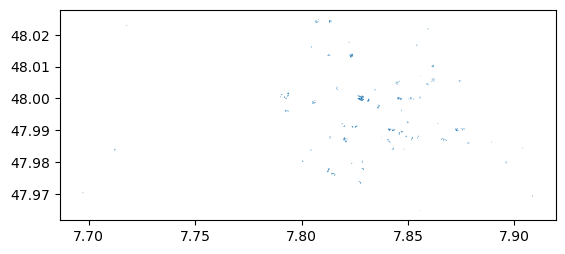

In [85]:
gdf.plot()

In [86]:
gdf

geometry  \
element_type osmid                                                         
way          23235196  POLYGON ((7.85012 47.99261, 7.85010 47.99254, ...   
             24066484  POLYGON ((7.81443 47.97629, 7.81465 47.97631, ...   
             24374420  POLYGON ((7.80032 47.98005, 7.80028 47.98018, ...   
             24612375  POLYGON ((7.79245 48.00013, 7.79245 48.00011, ...   
             24612414  POLYGON ((7.79331 48.00053, 7.79339 48.00061, ...   
...                                                                  ...   
relation     1424032   POLYGON ((7.82743 48.00007, 7.82754 48.00009, ...   
             4042765   POLYGON ((7.87291 47.98975, 7.87274 47.98978, ...   
             12074527  POLYGON ((7.81287 47.97766, 7.81285 47.97752, ...   
             13591447  POLYGON ((7.82073 47.98659, 7.82074 47.98660, ...   
             17709863  POLYGON ((7.82624 47.99147, 7.82603 47.99105, ...   

                      FIXME wheelchair wikipedia amenity layer  \
element_type osmid                                               
way          23235196   NaN        NaN       NaN     NaN   NaN   
             24066484   NaN        yes       NaN  school   NaN   
             24374420   NaN        NaN       NaN     NaN   NaN   
             24612375   NaN        NaN       NaN     NaN   NaN   
             24612414   NaN        yes       NaN     NaN   NaN   
...                     ...        ...       ...     ...   ...   
relation     1424032    NaN        NaN       NaN     NaN   NaN   
             4042765    NaN        NaN       NaN     NaN   NaN   
             12074527   NaN        NaN       NaN     NaN   NaN   
             13591447   NaN        NaN       NaN     NaN   NaN   
             17709863   NaN        NaN       NaN     NaN   NaN   

                                            operator              name  \
element_type osmid                                                       
way          23235196                            NaN               NaN   
             24066484                            NaN      Hauptgebäude   
             24374420  Staatliches Schulamt Freiburg   Schönbergschule   
             24612375                            NaN               NaN   
             24612414                            NaN  Kepler-Gymnasium   
...                                              ...               ...   
relation     1424032                             NaN               NaN   
             4042765                             NaN               NaN   
             12074527                            NaN               NaN   
             13591447                            NaN               NaN   
             17709863                            NaN               NaN   

                      description  \
element_type osmid                  
way          23235196         NaN   
             24066484         NaN   
             24374420         NaN   
             24612375         NaN   
             24612414         NaN   
...                           ...   
relation     1424032          NaN   
             4042765          NaN   
             12074527         NaN   
             13591447         NaN   
             17709863         NaN   

                                                                   nodes  ...  \
element_type osmid                                                        ...   
way          23235196  [251383462, 251383490, 251383478, 251383528, 1...  ...   
             24066484  [1057703047, 2956554170, 2956554180, 914106938...  ...   
             24374420  [360328564, 2926564050, 1081960960, 1081960943...  ...   
             24612375  [267551208, 3171110701, 9051901930, 3171110696...  ...   
             24612414  [267551454, 2250854574, 9051901926, 9051901927...  ...   
...                                                                  ...  ...   
relation     1424032   [[[1031195945, 7347685198, 1031196922, 1031195...  ...   
             4042765   [[[1026653459, 1026

In [87]:
p=[]
i_of_schools=[]
for index, row in gdf.iterrows():
    p=p+[row['geometry']]
    i_of_schools=i_of_schools+[index]
i_of_schools

[('way', 23235196),
 ('way', 24066484),
 ('way', 24374420),
 ('way', 24612375),
 ('way', 24612414),
 ('way', 24612428),
 ('way', 24634999),
 ('way', 24719975),
 ('way', 24720216),
 ('way', 24720395),
 ('way', 24739980),
 ('way', 24740387),
 ('way', 24741079),
 ('way', 24756034),
 ('way', 24756342),
 ('way', 32888251),
 ('way', 33900952),
 ('way', 33901390),
 ('way', 33901422),
 ('way', 41404824),
 ('way', 41404825),
 ('way', 41404826),
 ('way', 41404828),
 ('way', 41404829),
 ('way', 41880012),
 ('way', 83211117),
 ('way', 83372878),
 ('way', 87610953),
 ('way', 88054665),
 ('way', 88381741),
 ('way', 88383619),
 ('way', 88526884),
 ('way', 88526894),
 ('way', 88526908),
 ('way', 88526926),
 ('way', 88538890),
 ('way', 90577453),
 ('way', 91293977),
 ('way', 91514310),
 ('way', 91887321),
 ('way', 92130185),
 ('way', 92404903),
 ('way', 92414381),
 ('way', 92421328),
 ('way', 92421329),
 ('way', 92650426),
 ('way', 92650430),
 ('way', 92650432),
 ('way', 92650435),
 ('way', 93248848),


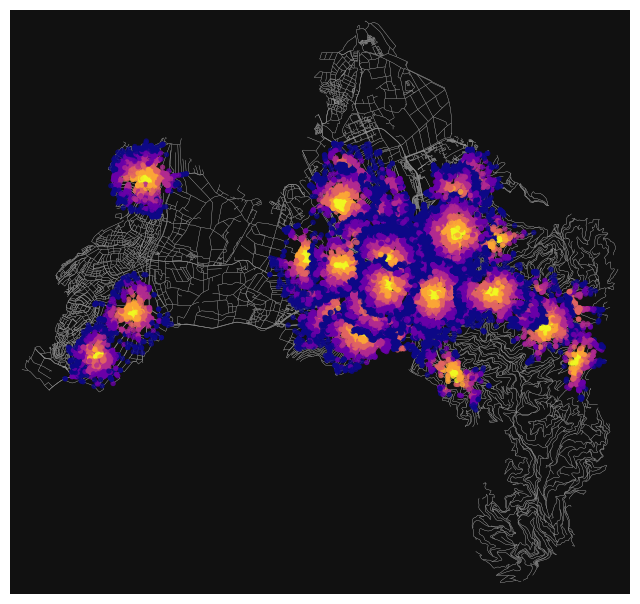

In [88]:
# color the nodes according to isochrone then plot the street network
node_colors = {}
for cur in p:
    poi=ox.distance.nearest_nodes(G, cur.centroid.x,cur.centroid.y)
    for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
        subgraph = nx.ego_graph(G, poi, radius=trip_time, distance="time")
        for node in subgraph.nodes():
            node_colors[node] = color

nc = [node_colors[node] if node in node_colors else "none" for node in G.nodes()]
ns = [15 if node in node_colors else 0 for node in G.nodes()]
fig, ax = ox.plot_graph(
    G,
    node_color=nc,
    node_size=ns,
    node_alpha=0.8,
    edge_linewidth=0.2,
    edge_color="#999999",
)

Quelle für die Schulen:  https://schulfinder.kultus-bw.de/
Grundschulen + Freiburg + Umgebung + 40km ergibt unter 500 Treffer und somit werden alle angezeigt. 

In [111]:
import json
sc='''{"hits":388,"radius":"50","schools":[
{"uuid":"d8f77dd9-23f7-4139-a9be-8b5b4cfcc3cb","outpost_number":"0","name":"Karlschule Grund- und Werkrealschule","city":"Freiburg im Breisgau","lat":48.00021,"lng":7.85576,"distance":658.61625648,"official":0,"marker_class":"marker blue","marker_label":"WR,G","website":null},
{"uuid":"7fafe6da-9009-4767-962b-1060191b9c29","outpost_number":"0","name":"Turnseeschule Grundschule","city":"Freiburg im Breisgau","lat":47.98809,"lng":7.84948,"distance":889.59142921,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"1cd35ac3-944f-408a-8b1c-68eac4d5f1e5","outpost_number":"0","name":"Hebelschule Grundschule","city":"Freiburg im Breisgau","lat":47.99696,"lng":7.8357,"distance":1024.01980151,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"cafbaaf3-5706-49a8-80fd-71ad01991d53","outpost_number":"0","name":"Lortzing-Grundschule","city":"Freiburg im Breisgau","lat":48.00514,"lng":7.84504,"distance":1057.31095645,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"cee723e4-9446-4cf5-a6f4-97b1f0e3f2d7","outpost_number":"0","name":"Lorettoschule Grundschule","city":"Freiburg im Breisgau","lat":47.98462,"lng":7.84367,"distance":1344.82494446,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"8674da62-9b93-44e7-a341-74074499294b","outpost_number":"0","name":"Weiherhof-Schule I Grundschule","city":"Freiburg im Breisgau","lat":48.0061,"lng":7.86124,"distance":1419.45316327,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"2f1781f7-dd58-4f02-9c5b-c06d27b54f09","outpost_number":"0","name":"Emil-Thoma-Grundschule","city":"Freiburg im Breisgau","lat":47.98694,"lng":7.86788,"distance":1710.64431286,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"3fb62063-1f67-41f2-848a-52b893073f99","outpost_number":"0","name":"Pestalozzi-Grundschule","city":"Freiburg im Breisgau","lat":47.9912,"lng":7.82026,"distance":2235.57413656,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"ef8083c4-bc6d-4bfd-96b6-96f5761a292f","outpost_number":"0","name":"Tullaschule Grundschule","city":"Freiburg im Breisgau","lat":48.01661,"lng":7.85394,"distance":2306.56910572,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"f8bcfa15-904d-4313-8844-8a123b0990f5","outpost_number":"0","name":"Vigeliusschule I Grundschule","city":"Freiburg im Breisgau","lat":47.98683,"lng":7.8187,"distance":2505.93694945,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"50cafe47-5757-4957-bd3d-59e0dddec37e","outpost_number":"0","name":"Anne-Frank-Schule Grundschule","city":"Freiburg im Breisgau","lat":48.00347,"lng":7.81676,"distance":2563.48836805,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"b58b2a3e-582d-4379-be7d-3d89315042c6","outpost_number":"0","name":"Paul-Hindemith-Schule Grundschule","city":"Freiburg im Breisgau","lat":48.01384,"lng":7.82256,"distance":2807.65102781,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"72c74693-051b-4436-b81e-713cc6d90639","outpost_number":"0","name":"Deutsch-Französ. Grundschule","city":"Freiburg im Breisgau","lat":47.98813,"lng":7.8135,"distance":2814.36064423,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"77008805-b673-4593-8f10-13ce045f3832","outpost_number":"0","name":"Emil-Gött-Schule Grundschule","city":"Freiburg im Breisgau","lat":48.02179,"lng":7.85947,"distance":2954.24885536,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"62a219c9-1fd2-4125-ad14-2f3d0b719f1d","outpost_number":"0","name":"Karoline-Kaspar-Grundschule","city":"Freiburg im Breisgau","lat":47.97374,"lng":7.82752,"distance":2971.23703974,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"bdbc7bc7-64fa-4546-bbd5-be96a535000d","outpost_number":"0","name":"Adolf-Reichwein-Schule Grundschule, Sonderpäd. Bild. und Beratungszentrum Emotionale u. soziale Entw.","city":"Freiburg im Breisgau","lat":47.99866,"lng":7.80562,"distance":3270.12091794,"official":0,"marker_class":"marker yellow","marker_label":"S,G","website":null},
{"uuid":"dda01f12-1a0a-4c0b-adeb-e319914ddb3b","outpost_number":"0","name":"Gerhart-Hauptmann-Schule Grundschule","city":"Freiburg im Breisgau","lat":48.01365,"lng":7.81227,"distance":3382.80797298,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"3214b14d-7366-4b51-a9e5-00376a620be1","outpost_number":"0","name":"Schneeburgschule Grundschule","city":"Freiburg im Breisgau","lat":47.9782,"lng":7.81249,"distance":3391.62882634,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"4f24e1f5-ccd6-482a-9a13-3494cc651a7f","outpost_number":"0","name":"Hexentalschule Grundschule","city":"Merzhausen","lat":47.966353,"lng":7.827158,"distance":3697.90791882,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"9a465ab9-8a96-4d57-88a4-f3acbafbd2a4","outpost_number":"0","name":"Reinhold-Schneider-Schule Offene Ganztagsgrundschule","city":"Freiburg im Breisgau","lat":47.97965,"lng":7.89602,"distance":3921.63056831,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"1ccf4fb0-e304-4834-aef7-4a33a1969469","outpost_number":"0","name":"Johannes-Schwartz-Schule Grundschule","city":"Freiburg im Breisgau","lat":48.0158,"lng":7.80515,"distance":3954.84566192,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"eef21ca6-fdba-4f7e-a4f7-7d5e9b2942a9","outpost_number":"0","name":"Schönbergschule Grundschule","city":"Freiburg im Breisgau","lat":47.98015,"lng":7.8009,"distance":4021.17442403,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"581dea3e-3e55-4200-9932-29c8d528dd56","outpost_number":"0","name":"Clara-Grunwald-Schule Grundschule","city":"Freiburg im Breisgau","lat":47.99991,"lng":7.7928,"distance":4232.83393726,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"2988ba29-2031-4db9-9482-9840d9eea2ef","outpost_number":"0","name":"Feyel-Schule Grundschule","city":"Freiburg im Breisgau","lat":47.98436,"lng":7.90376,"distance":4250.4102177,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"541a9b7a-bc4f-4b9d-a294-a618914df49f","outpost_number":"0","name":"Albert-Schweitzer-Schule I Grundschule","city":"Freiburg im Breisgau","lat":48.02415,"lng":7.80725,"distance":4423.44330579,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"7e67e510-e4d1-43fe-98ee-9c2517952a02","outpost_number":"0","name":"Johann-Peter-Hebel-Schule Grundschule","city":"Gundelfingen","lat":48.04191,"lng":7.86496,"distance":5224.72457362,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"22b66410-ff53-4a95-a215-7c72d8e76f02","outpost_number":"0","name":"Schauinslandschule Grundschule","city":"Freiburg im Breisgau","lat":47.96916,"lng":7.90861,"distance":5328.02423787,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"1432bc56-a642-47c2-8476-ef0af8b4efc5","outpost_number":"0","name":"Franz-Xaver-Klingler Grundschule","city":"Wittnau","lat":47.9432,"lng":7.81422,"distance":6437.9576285,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"96f8f257-d622-4ee8-8025-d6f244cf532a","outpost_number":"0","name":"Grundschule Horben","city":"Horben","lat":47.9355335,"lng":7.858796,"distance":6769.83392276,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"b5048148-8fe6-4981-b7b3-6cd2f8510b0b","outpost_number":"0","name":"Mühlmattenschule Grundschule","city":"Freiburg im Breisgau","lat":48.0477,"lng":7.79962,"distance":6829.38130715,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"9fc07b48-6418-4c73-85d7-fdd8b9f09b5b","outpost_number":"0","name":"Schönbergschule","city":"Ebringen","lat":47.95588,"lng":7.77569,"distance":7077.95883985,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"6976df4e-7cf1-4210-9d3d-454f9cff8877","outpost_number":"0","name":"Grundschule Umkirch","city":"Umkirch","lat":48.02943,"lng":7.76815,"distance":7090.26963816,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"ba4ca9ac-73e2-4b58-a956-497e93bff2cd","outpost_number":"1","name":"Jengerschule Gemeinschaftsschule","city":"Schallstadt","lat":47.96249,"lng":7.76637,"distance":7221.83012276,"official":0,"marker_class":"marker orange","marker_label":"GM,G","website":null},
{"uuid":"c9600060-dadf-40e9-88da-c4b9361d966f","outpost_number":"0","name":"Johann-Philipp-Glock-Schule Grundschule","city":"Schallstadt","lat":47.96249,"lng":7.76637,"distance":7221.83012276,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"0542cbb3-d4bc-4e89-8d6a-9337cb6c724e","outpost_number":"0","name":"Grundschule Vörstetten","city":"Vörstetten","lat":48.0626069,"lng":7.8427036,"distance":7413.08674804,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"dd347bb4-e231-4207-81fc-8c80d6b110d2","outpost_number":"1","name":"Johann-Peter-Hebel-Schule Grundschule","city":"Heuweiler","lat":48.05205,"lng":7.90483,"distance":7464.05021308,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"96e111d3-3818-400b-9c68-c0ac5d0bd7a3","outpost_number":"0","name":"Abt-Steyrer-Schule Grundschule","city":"Sölden","lat":47.93432,"lng":7.80862,"distance":7509.70768908,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"6d3d105d-96ce-4551-8f60-320d97b90d92","outpost_number":"1","name":"Grundschule Denzlingen","city":"Denzlingen","lat":48.0667,"lng":7.88328,"distance":8245.73747379,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"0bb10f45-f511-42a0-8c9f-65f163116b69","outpost_number":"0","name":"Grundschule Hugstetten","city":"March","lat":48.056,"lng":7.78118,"distance":8373.56528245,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"a43e9a1a-599b-416a-91a6-62cca50b9eb6","outpost_number":"0","name":"Grundschule Kirchzarten","city":"Kirchzarten","lat":47.96404,"lng":7.9555,"distance":8664.16687446,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"5a259536-7669-4d7c-9962-a5bbc1ef1776","outpost_number":"0","name":"Grundschule Stegen","city":"Stegen","lat":47.98154,"lng":7.96484,"distance":8742.04290146,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"6fa5150a-a3fe-402e-8a3b-0d82fc7d3dd0","outpost_number":"0","name":"Grundschule Denzlingen","city":"Denzlingen","lat":48.0692,"lng":7.89618,"distance":8842.35604674,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"af3f317d-4e14-47a5-8230-7c3daf053c67","outpost_number":"0","name":"Grundschule Holzhausen","city":"March","lat":48.07017,"lng":7.79512,"distance":9172.97598846,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"08b4912d-1af4-4c2f-b6d7-3c376ae7c1c2","outpost_number":"0","name":"Schurhammer-Schule Grundschule","city":"Glottertal","lat":48.04982,"lng":7.94349,"distance":9201.08445473,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"4b8925ae-9b60-49fc-8a42-ebc7a5097ad2","outpost_number":"0","name":"Schneckentalschule Grundschule","city":"Pfaffenweiler","lat":47.93918,"lng":7.75682,"distance":9357.03979752,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"92b5310b-6098-44f4-8e5e-90b16820e3d4","outpost_number":"0","name":"Grundschule Eschbach","city":"Stegen","lat":48.00231,"lng":7.97676,"distance":9501.4115933,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"16e4d083-b8f3-4ec3-a0e4-f9eed0021713","outpost_number":"0","name":"Tunibergschule Grundschule Opfingen","city":"Freiburg im Breisgau","lat":48.00041,"lng":7.72026,"distance":9620.89754019,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"0269033e-c840-4d43-841a-839713509867","outpost_number":"0","name":"Marie-Luise-Kaschnitz-Schule","city":"Bollschweil","lat":47.91981,"lng":7.7864,"distance":9692.8955719,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"3ac79b13-c273-453b-b949-6d43178ba12a","outpost_number":"0","name":"Eichmattenschule Grundschule Reute","city":"Reute","lat":48.08255,"lng":7.82021,"distance":9855.82500054,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"7b7d9689-5ee4-417b-a9a3-24d52a15f7a0","outpost_number":"0","name":"Grundschule Neuershausen","city":"March","lat":48.07009,"lng":7.77043,"distance":10108.74820134,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"584d5e2c-b829-4a34-b262-b1cd9ba69f90","outpost_number":"0","name":"Hofacker-Schule Grundschule","city":"Freiburg im Breisgau","lat":48.02319,"lng":7.71792,"distance":10234.52237667,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"31744d71-f984-418e-b2c4-34fccad31d61","outpost_number":"0","name":"Markgrafenschule Grundschule","city":"Freiburg im Breisgau","lat":47.98393,"lng":7.71188,"distance":10322.99675495,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"ac131493-f1a5-4914-8be9-e5b40a83cb8a","outpost_number":"0","name":"Michael-Schule Grundschule","city":"Oberried","lat":47.93345,"lng":7.95283,"distance":10383.52907701,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"e178d268-2cd9-47cc-9359-6e134f63b1e0","outpost_number":"0","name":"Grundschule Buchholz","city":"Waldkirch","lat":48.08211,"lng":7.9178,"distance":10832.8060576,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"703e6c6f-735d-462d-9ef6-4a43bcec6eec","outpost_number":"0","name":"Tarodunum-Schule Grundschule","city":"Kirchzarten","lat":47.96161,"lng":7.98553,"distance":10833.83461522,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"67bb24c7-3746-48b9-bbb5-fd05b21c0382","outpost_number":"0","name":"Grundschule Gottenheim","city":"Gottenheim","lat":48.05053,"lng":7.72474,"distance":11072.33497839,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"709894b3-7db4-4124-a023-3208717dbc58","outpost_number":"0","name":"Alemannen-Grundschule","city":"Schallstadt","lat":47.95632,"lng":7.71029,"distance":11259.90181175,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"2c931638-0562-4e21-a2e0-eb679611006e","outpost_number":"3","name":"Jengerschule Gemeinschaftsschule","city":"Ehrenkirchen","lat":47.92324,"lng":7.74375,"distance":11291.96175471,"official":0,"marker_class":"marker orange","marker_label":"GM,G","website":null},
{"uuid":"767b9a67-41eb-45a6-b633-e8654f55bdbe","outpost_number":"0","name":"Grundschule Wasser","city":"Emmendingen","lat":48.09757,"lng":7.85795,"distance":11301.94876741,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"f58f6ce9-7d51-4e39-b73d-76a3e838903d","outpost_number":"0","name":"Lindenbergschule Grundschule","city":"Freiburg im Breisgau","lat":47.97156,"lng":7.6997,"distance":11470.82745965,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"99b81ab8-342f-4045-bc10-ec9904926b97","outpost_number":"0","name":"Grundschule Stohren","city":"Münstertal","lat":47.89243,"lng":7.87442,"distance":11676.16812383,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"08420936-befc-4d8f-b6a0-dad7610e2266","outpost_number":"2","name":"Jengerschule Gemeinschaftsschule","city":"Ehrenkirchen","lat":47.9133155,"lng":7.7505589,"distance":11785.38777359,"official":0,"marker_class":"marker orange","marker_label":"GM,G","website":null},
{"uuid":"efd71e80-b723-480c-9470-fa67de892ff3","outpost_number":"0","name":"Jengerschule Gemeinschaftsschule","city":"Ehrenkirchen","lat":47.917015,"lng":7.742523,"distance":11859.81829998,"official":0,"marker_class":"marker orange","marker_label":"GM,G","website":null},
{"uuid":"dc8b07ca-f580-4bbe-a46a-f03cf6d0bc5d","outpost_number":"0","name":"Grundschule Kollmarsreute","city":"Emmendingen","lat":48.10202,"lng":7.87914,"distance":11984.53153017,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"65807fb4-85f4-4c81-870a-3bc66911f6dc","outpost_number":"0","name":"Hermann-Brommer-Schule Grundschule","city":"Merdingen","lat":48.01955,"lng":7.6893,"distance":12192.64174812,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"24c21271-9325-4d54-aa1e-9259d4b6911e","outpost_number":"0","name":"Sommerbergschule Grundschule","city":"Buchenbach","lat":47.96321,"lng":8.00629,"distance":12236.76459364,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"ca6ec1a7-30e5-460a-86d9-e1e8229b92ca","outpost_number":"0","name":"Fritz-Boehle-Grund- und Werkrealschule","city":"Emmendingen","lat":48.10707,"lng":7.86092,"distance":12370.08822323,"official":0,"marker_class":"marker blue","marker_label":"WR,G","website":null},
{"uuid":"cf999da3-e527-4fe9-913e-e8b61add7640","outpost_number":"0","name":"Grundschule Sexau","city":"Sexau","lat":48.10105,"lng":7.90723,"distance":12437.50654322,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"92e6bcb9-ee65-4276-a719-c0fddfdb1d48","outpost_number":"0","name":"Wilhelm-August-Lay-Schule Grund-, Werkreal- und Realschule","city":"Bötzingen","lat":48.07277,"lng":7.72048,"distance":12829.16485972,"official":0,"marker_class":"marker cyan","marker_label":"R,WR,G","website":null},
{"uuid":"cecd96aa-16b1-4351-9761-20ee5bfe1da9","outpost_number":"1","name":"Michael-Schule Grundschule","city":"Oberried","lat":47.92435,"lng":7.98553,"distance":12898.88353291,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"cf40001a-f977-403d-aecb-679134b86948","outpost_number":"0","name":"Kastelbergschule Gemeinschaftsschule","city":"Waldkirch","lat":48.09214,"lng":7.95293,"distance":13164.46551244,"official":0,"marker_class":"marker orange","marker_label":"GM,G","website":null},
{"uuid":"f70e0930-2d77-409a-bb0e-e93feb1029db","outpost_number":"2","name":"Abt-Columban-Schule Grundschule Münstertal","city":"Münstertal","lat":47.8778,"lng":7.83622,"distance":13189.8743727,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"fd3f5a63-62b4-4016-ba3b-2739df11bde1","outpost_number":"0","name":"Antoniter-Grundschule Nimburg","city":"Teningen","lat":48.1047,"lng":7.77472,"distance":13291.57081964,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"0797dfd5-cd06-4001-ba90-b8e5d30c6e96","outpost_number":"0","name":"Grundschule Rimsingen","city":"Breisach am Rhein","lat":47.98439,"lng":7.67139,"distance":13310.93253786,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"defba5bb-3bb5-4166-85e2-ad8147fcb279","outpost_number":"0","name":"Grundschule Biengen","city":"Bad Krozingen","lat":47.93807,"lng":7.69187,"distance":13385.71344032,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"30f70f6b-2fa3-4f9f-a232-522fd8e1e363","outpost_number":"0","name":"Markgrafen-Grund- und Realschule","city":"Emmendingen","lat":48.11716,"lng":7.8566,"distance":13473.00684335,"official":0,"marker_class":"marker cyan","marker_label":"R,G","website":null},
{"uuid":"6c08b3a0-e309-4de6-856a-87991885a072","outpost_number":"0","name":"Schwarzenbergschule","city":"Waldkirch","lat":48.09145,"lng":7.96183,"distance":13501.59967418,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"6ab77fb0-c24f-42c6-8aec-f7e49a16cdaa","outpost_number":"0","name":"Grundschule Windenreute","city":"Emmendingen","lat":48.11627,"lng":7.87779,"distance":13528.9644993,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"91723db4-7a54-4923-a22a-8b7e041acae0","outpost_number":"0","name":"Adolf-Gänshirt-Schule Grundschule","city":"Eichstetten am Kaiserstuhl","lat":48.0931,"lng":7.73754,"distance":13620.21439141,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"1173f8dd-b4d9-42ff-8500-d0ab0683c955","outpost_number":"1","name":"Grundschule Rimsingen","city":"Breisach am Rhein","lat":47.97743,"lng":7.66497,"distance":13881.83438905,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"3a9e791b-01f6-4e4a-a15e-05eb99012c80","outpost_number":"2","name":"Grundschule Biengen","city":"Bad Krozingen","lat":47.95536,"lng":7.67309,"distance":13883.84139182,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"72872d87-8174-4b56-b62b-ac13a29e5cdc","outpost_number":"0","name":"Abt-Steyrer-Schule Grundschule","city":"St. Peter","lat":48.01778,"lng":8.0345,"distance":13979.90771289,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"9798a10a-693a-43d2-85a9-eafd5f773a0c","outpost_number":"2","name":"Neunlinden-Schule Gemeinschaftsschule","city":"Ihringen","lat":48.05224,"lng":7.68109,"distance":13987.86748107,"official":0,"marker_class":"marker orange","marker_label":"GM,G","website":null},
{"uuid":"30a6852f-2bd8-4001-9b5f-9a0f6944fa8f","outpost_number":"0","name":"Grundschule Mundingen","city":"Emmendingen","lat":48.12271,"lng":7.84607,"distance":14081.68537481,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"a1488913-d74c-44bc-a699-2d7c5296c5be","outpost_number":"0","name":"Carl-Friedrich-Meerwein- Grundschule","city":"Emmendingen","lat":48.12366,"lng":7.84527,"distance":14188.46623813,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"4fa6cd0f-ff78-4c7a-afd9-40a631fe6c8f","outpost_number":"0","name":"Joh.-Heinrich-v.Landeck-Schule Grund- und Werkrealschule","city":"Bad Krozingen","lat":47.91342,"lng":7.7041,"distance":14198.01360305,"official":0,"marker_class":"marker blue","marker_label":"WR,G","website":null},
{"uuid":"ef64cbb9-4cab-4b16-9e3d-8bd3fdf75009","outpost_number":"0","name":"Johann-Peter-Hebel-Grundschule","city":"Teningen","lat":48.12276,"lng":7.81631,"distance":14298.14614842,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"08a0142e-2377-41fd-9741-7d8b4e8431da","outpost_number":"1","name":"Nikolaus-Christian-Sander- Schule Grundschule Köndringen","city":"Teningen","lat":48.12276,"lng":7.81621,"distance":14299.42626761,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"0dda1b50-6b04-47c0-a8b8-8ac6e1bf3e7f","outpost_number":"1","name":"Johann-Peter-Hebel-Grundschule","city":"Teningen","lat":48.12583,"lng":7.80525,"distance":14794.85278768,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"a4617c2e-d9ed-4aba-bfdd-7a5d90104cfc","outpost_number":"0","name":"Grundschule am Kohlenbach","city":"Waldkirch","lat":48.10454,"lng":7.96894,"distance":14979.13620616,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"a80f807e-b651-4c82-a4b3-e40c8a086e09","outpost_number":"1","name":"Grundschule Biengen","city":"Bad Krozingen","lat":47.9245,"lng":7.67806,"distance":15037.9972811,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"112ef8f0-4a9f-47e8-9c78-a0b5feb23902","outpost_number":"1","name":"Julius-Leber-Schule Grund- und Gemeinschaftsschule","city":"Breisach am Rhein","lat":48.01449,"lng":7.6392,"distance":15771.427892,"official":0,"marker_class":"marker orange","marker_label":"GM,G","website":null},
{"uuid":"b1e798be-c522-4c37-b049-461829fabeeb","outpost_number":"0","name":"Neunlinden-Schule Gemeinschaftsschule","city":"Ihringen","lat":48.04462,"lng":7.64894,"distance":15855.70772281,"official":0,"marker_class":"marker orange","marker_label":"GM,G","website":null},
{"uuid":"8b7c0b19-e180-40e6-903a-c66a1a40269d","outpost_number":"0","name":"Thaddäus-Rinderle-Schule Grundschule","city":"Staufen im Breisgau","lat":47.8773,"lng":7.72787,"distance":16013.71789749,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"8553e776-e4b6-46c1-be4b-b86ae2fb213a","outpost_number":"0","name":"Nikolaus-Christian-Sander- Schule Grundschule Köndringen","city":"Teningen","lat":48.13993,"lng":7.80285,"distance":16364.0390294,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"13940b81-d2a6-4db3-8855-3db34e702aee","outpost_number":"0","name":"Abt-Columban-Schule Grundschule Münstertal","city":"Münstertal","lat":47.85463,"lng":7.78807,"distance":16380.041678,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"45dbff56-a1fc-492e-b1f6-8fea011763d1","outpost_number":"1","name":"Johanniterschule Heitersheim Grund-, Werkreal- und Realschule","city":"Münstertal","lat":47.8543,"lng":7.78753,"distance":16426.53317424,"official":0,"marker_class":"marker cyan","marker_label":"R,WR,G","website":null},
{"uuid":"783bcfd6-f6ec-4a1e-a39b-295987eb705b","outpost_number":"0","name":"Silberbergschule Grundschule","city":"Bahlingen am Kaiserstuhl","lat":48.1234,"lng":7.73475,"distance":16522.68231185,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"8be58cfa-8faa-4dab-b9d8-2f4c812f7099","outpost_number":"0","name":"Grundschule ZweiTälerLand","city":"Gutach im Breisgau","lat":48.11669,"lng":7.99144,"distance":17066.81100144,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"3e09fd46-0c23-45e1-8c39-46f8bf63d62e","outpost_number":"0","name":"Grundschule Tunsel","city":"Bad Krozingen","lat":47.90319,"lng":7.66519,"distance":17173.54504003,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"cf8cbc30-b5a2-4d60-8586-23a00e874de3","outpost_number":"0","name":"Grundschule Wieden-Utzenfeld","city":"Wieden","lat":47.8414,"lng":7.88124,"distance":17363.65540613,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"985af099-d8f3-4879-a9b1-6e3d2c59c739","outpost_number":"2","name":"Grundschule Oberes Wiesental","city":"Todtnau","lat":47.85259,"lng":7.94281,"distance":17408.46725403,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"b0dc5a91-c8f0-43ea-8f46-ef9f8dd94018","outpost_number":"0","name":"Alemannenschule Grundschule Hartheim","city":"Hartheim am Rhein","lat":47.93484,"lng":7.63086,"distance":17639.06591087,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"70ca5f2a-d12b-4415-84c7-95330acb390f","outpost_number":"1","name":"Thaddäus-Rinderle-Schule Grundschule","city":"Staufen im Breisgau","lat":47.8727,"lng":7.69482,"distance":17912.76892309,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"e2bd6eb4-ca8d-4e03-b7cd-cd6e1b78b3a7","outpost_number":"2","name":"Wilhelm-Hildenbrand-Schule Grundschule","city":"Vogtsburg im Kaiserstuhl","lat":48.09704,"lng":7.65932,"distance":18046.04484752,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"40f36cbd-0c6a-4bd3-ba58-28ec90a898e1","outpost_number":"0","name":"Carl-Ludwig-Magon-Schule Grundschule","city":"Breitnau","lat":47.9393,"lng":8.07755,"distance":18121.6965951,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"ca5740fb-9dce-42a6-9c77-7ecf1f0e92b1","outpost_number":"0","name":"Urban Heim Grundschule","city":"St. Märgen","lat":48.00697,"lng":8.0935,"distance":18201.68984842,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"ed7964fa-82dd-4357-a082-ec4f25727feb","outpost_number":"0","name":"Michaelschule Grundschule Riegel","city":"Riegel","lat":48.14838,"lng":7.75084,"distance":18449.47376145,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"3d22c2d4-098f-4103-8879-15427c163162","outpost_number":"0","name":"Grundschule","city":"Malterdingen","lat":48.15938,"lng":7.79008,"distance":18684.21022064,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"621dbcae-ca58-4677-b66f-fe714d5ff4f9","outpost_number":"0","name":"Rappoltsteiner Grundschule","city":"Eschbach","lat":47.88858,"lng":7.65511,"distance":18771.12082465,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"c422f721-71f3-4458-9cc9-a1560bdf9965","outpost_number":"0","name":"Sonnenbergschule","city":"Ballrechten-Dottingen","lat":47.85832,"lng":7.69914,"distance":18974.38478176,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"0fd8b643-5865-4399-9350-9d6cff42b075","outpost_number":"0","name":"Grundschule am Erle","city":"Endingen am Kaiserstuhl","lat":48.1376,"lng":7.70518,"distance":19037.94865546,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"9096887e-a008-4bc0-b263-b686b63a2d5f","outpost_number":"0","name":"Wilhelm-Hildenbrand-Schule Grundschule","city":"Vogtsburg im Kaiserstuhl","lat":48.08714,"lng":7.62866,"distance":19282.45526211,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"f6a67fff-241d-49c0-a9ec-09b19e4dbca3","outpost_number":"0","name":"Johanniterschule Heitersheim Grund-, Werkreal- und Realschule","city":"Heitersheim","lat":47.87278,"lng":7.66572,"distance":19371.4760912,"official":0,"marker_class":"marker cyan","marker_label":"R,WR,G","website":null},
{"uuid":"21788121-4e2c-4d08-8862-fc92b45084e4","outpost_number":"0","name":"Grundschule Simonswald","city":"Simonswald","lat":48.10204,"lng":8.05681,"distance":19403.37289627,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"351806f5-f7f9-4223-82c1-3c39e5ee9b83","outpost_number":"0","name":"Julius-Leber-Schule Grund- und Gemeinschaftsschule","city":"Breisach am Rhein","lat":48.03507,"lng":7.59025,"distance":19757.30860107,"official":0,"marker_class":"marker orange","marker_label":"GM,G","website":null},
{"uuid":"a9070670-3c68-4252-a046-16f53adb9f88","outpost_number":"0","name":"Grundschule Oberes Wiesental","city":"Todtnau","lat":47.829931,"lng":7.944673,"distance":19793.5270058,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"ed536cea-3128-43f0-9ea0-bd5eb016bf5c","outpost_number":"0","name":"Schulzentrum Freiamt Grund- und Werkrealschule","city":"Freiamt","lat":48.17218,"lng":7.8916,"distance":19829.66412404,"official":0,"marker_class":"marker blue","marker_label":"WR,G","website":null},
{"uuid":"2499ff5d-7ab0-4ed6-a2aa-f0a49fcc9843","outpost_number":"0","name":"Ernst-Leitz-Schule Grundschule","city":"Sulzburg","lat":47.84082,"lng":7.71302,"distance":20034.51242551,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"985e4d8a-ca71-4fb1-a891-10b5ed018fef","outpost_number":"1","name":"Maria Sibylla Merian Grundschule Kiechlinsbergen- Königschaffhausen","city":"Endingen am Kaiserstuhl","lat":48.12287,"lng":7.65706,"distance":20076.43643717,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"8ccfe2ff-f0b0-4bb4-a430-eae130f51caf","outpost_number":"0","name":"Drei-Linden-Grundschule Hecklingen mit Außenstelle Nordweil","city":"Kenzingen","lat":48.16944,"lng":7.77093,"distance":20137.76952036,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"349145dd-5bbd-43bd-af59-e79cff3683cf","outpost_number":"0","name":"Maria Sibylla Merian Grundschule Kiechlinsbergen- Königschaffhausen","city":"Endingen am Kaiserstuhl","lat":48.12417,"lng":7.65655,"distance":20204.94113323,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"8b84937f-b1cc-4ce3-8358-28f45e289896","outpost_number":"0","name":"Hörnlebergschule Grundschule","city":"Winden im Elztal","lat":48.14176,"lng":8.02003,"distance":20569.71448325,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"da7578e9-f9b6-4d77-b522-dfaf7c93af0f","outpost_number":"1","name":"Hörnlebergschule Grundschule","city":"Winden im Elztal","lat":48.14176,"lng":8.02003,"distance":20569.71448325,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"6e25a216-4567-4476-be9f-b7530f9b8a7a","outpost_number":"0","name":"Grundschule Theresianum","city":"Breisach am Rhein","lat":48.03121,"lng":7.57684,"distance":20646.89644883,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"b52e6973-d9e6-47f1-9ff3-423c9d758ba0","outpost_number":"1","name":"Ernst-Leitz-Schule Grundschule","city":"Sulzburg","lat":47.84379,"lng":7.68201,"distance":21033.09884125,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"379ddb6f-c028-4e7e-aa50-7b39d092a857","outpost_number":"0","name":"Grundschule","city":"Aitern","lat":47.80406,"lng":7.89531,"distance":21625.34083395,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"3871f695-1e9a-46b0-8ccd-cfe9e47fb360","outpost_number":"0","name":"Georg-Thoma-Schule Grundschule","city":"Hinterzarten","lat":47.90402,"lng":8.10519,"distance":21626.84260784,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"48efe851-bfca-4689-8058-a58c07c74ea5","outpost_number":"1","name":"Drei-Linden-Grundschule Hecklingen mit Außenstelle Nordweil","city":"Kenzingen","lat":48.19332,"lng":7.8152,"distance":22077.59016064,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"4a767327-be98-402a-bb3b-f12d56154550","outpost_number":"1","name":"Grundschule Oberes Wiesental","city":"Todtnau","lat":47.80378,"lng":7.939053,"distance":22404.03687342,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"4f430210-24bb-46e9-964a-4974cedd32a0","outpost_number":"0","name":"Grundschule Gütenbach","city":"Gütenbach","lat":48.04764,"lng":8.14083,"distance":22419.4810537,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"c4ab6021-8bdc-4d95-bf85-32e9894845b4","outpost_number":"1","name":"Schulzentrum Oberes Elztal Grund-, Werkreal- und Realschule","city":"Winden im Elztal","lat":48.1522,"lng":8.04691,"distance":22730.13894624,"official":0,"marker_class":"marker cyan","marker_label":"R,WR,G","website":null},
{"uuid":"a6eea1ba-5a5c-43be-ab66-457ec4328cc4","outpost_number":"0","name":"Grundschule an der Kleinen Elz Kenzingen","city":"Kenzingen","lat":48.19373,"lng":7.76856,"distance":22781.91229284,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"18155a64-670d-4a7b-b1e2-3dd67749d2da","outpost_number":"1","name":"Rosenburg-Schule Grundschule","city":"Müllheim","lat":47.82776,"lng":7.67376,"distance":22840.94247241,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"8fcc84f4-6439-47e1-9569-732e172f05d6","outpost_number":"0","name":"Grundschule Buggingen","city":"Buggingen","lat":47.84649,"lng":7.63766,"distance":22927.5488177,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"c70c2f2c-01b2-4b1f-8f79-660f6aec0148","outpost_number":"1","name":"Rheinschule Neuenburg am Rhein Grundschule","city":"Neuenburg am Rhein","lat":47.87164,"lng":7.59416,"distance":23517.56311357,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"53feb998-ff47-4f37-9e3f-7536b155535c","outpost_number":"0","name":"Johann Peter Hebel- Grundschule Wagenstadt","city":"Herbolzheim","lat":48.2048,"lng":7.79487,"distance":23558.14344722,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"a8888066-a76d-43eb-b181-bc12070fbe8d","outpost_number":"0","name":"Rheinauen-Grundschule","city":"Sasbach am Kaiserstuhl","lat":48.1368604,"lng":7.6108321,"distance":23649.1209131,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"e98341ce-8a88-4b20-84b5-3c645cb78725","outpost_number":"0","name":"Grundschule Waldau-Langenordnach","city":"Titisee-Neustadt","lat":47.98289,"lng":8.16759,"distance":23724.8344312,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"ef1ea4f1-b9d1-40b8-b4e8-e7ff0b160a11","outpost_number":"1","name":"René-Schickele-Schule Grundschule","city":"Badenweiler","lat":47.8079318,"lng":7.6926675,"distance":23963.51198849,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"96e7fcad-99d9-4dd7-bba1-c095b7a0a5c5","outpost_number":"0","name":"Grundschule Wyhl","city":"Wyhl am Kaiserstuhl","lat":48.16408,"lng":7.64414,"distance":24113.16511256,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"1f1ab26f-5fff-47aa-b002-cd13d02b493b","outpost_number":"0","name":"Buchenbrandschule Grundschule","city":"Schönau im Schwarzwald","lat":47.78103,"lng":7.89477,"distance":24151.72476233,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"b521ec04-588d-4fe1-8ee6-15c0d6a800b4","outpost_number":"0","name":"Grundschule Neukirch","city":"Furtwangen im Schwarzwald","lat":48.0236,"lng":8.17475,"distance":24395.22006951,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"e20fd245-b6e9-43b6-ac74-7d75bc859541","outpost_number":"0","name":"Hirschbühlschule Grundschule","city":"Titisee-Neustadt","lat":47.90371,"lng":8.14734,"distance":24451.73954425,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"9e08bb27-32b9-4c52-b420-c3d5289a2034","outpost_number":"0","name":"René-Schickele-Schule Grundschule","city":"Badenweiler","lat":47.80791,"lng":7.67387,"distance":24679.11443188,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"b3b42796-3b9e-46e9-81c3-c5cdbdca58c1","outpost_number":"0","name":"Johann-Ganter-Schule Grundschule","city":"Herbolzheim","lat":48.21799,"lng":7.83057,"distance":24713.75815146,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"fdf1021e-c8a3-4ada-814d-31dc988c7e3f","outpost_number":"0","name":"Grundschule Feldberg","city":"Feldberg (Schwarzwald)","lat":47.85943,"lng":8.11131,"distance":24733.10937547,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"cb075499-da3a-4d5d-a5b9-a43b0c1f5e92","outpost_number":"0","name":"Hans-Thoma-Grundschule","city":"Bernau im Schwarzwald","lat":47.80941,"lng":8.03202,"distance":24823.57157774,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"68605bf0-7e4f-44ee-abf0-7edc783c7076","outpost_number":"0","name":"Schulzentrum Oberes Elztal Grund-, Werkreal- und Realschule","city":"Elzach","lat":48.17313,"lng":8.06944,"distance":25586.98272372,"official":0,"marker_class":"marker cyan","marker_label":"R,WR,G","website":null},
{"uuid":"a3e202c6-7852-4f3a-985f-569a167b2a9c","outpost_number":"0","name":"Grundschule Herbolzheim","city":"Herbolzheim","lat":48.22266,"lng":7.77177,"distance":25844.36340453,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"a4f81050-5ad6-4f2d-a322-e4c2ff30f6d4","outpost_number":"0","name":"Grundschule Biederbach","city":"Biederbach","lat":48.19456,"lng":8.03362,"distance":25965.61299682,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"69a95ee5-7d0f-423b-a73e-5a7bb2b4b091","outpost_number":"0","name":"Grundschule am Rheinwald","city":"Weisweil","lat":48.198318,"lng":7.66954,"distance":26154.64202939,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"db6f5a32-d560-4c92-a117-769fcebea7cd","outpost_number":"0","name":"Michael-Friedrich-Wild- Grundschule","city":"Müllheim","lat":47.81241,"lng":7.62948,"distance":26189.55175355,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"b35ab4d3-050a-4322-9f93-0f593c1210bd","outpost_number":"2","name":"Grundschule Schuttertal","city":"Schuttertal","lat":48.21988,"lng":7.96556,"distance":26336.55124966,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"aa58476f-8823-4064-8c2c-7cda598c1bd2","outpost_number":"3","name":"Rheinschule Neuenburg am Rhein Grundschule","city":"Neuenburg am Rhein","lat":47.84162,"lng":7.58147,"distance":26337.86635914,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"f06cc090-dae3-42da-81d7-74c4fd33ff10","outpost_number":"0","name":"Anne-Frank-Grundschule","city":"Furtwangen im Schwarzwald","lat":48.0499,"lng":8.19611,"distance":26470.17630457,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"549b04f1-094a-4c8d-97d9-bf644b2d8024","outpost_number":"0","name":"Grundschule Malsburg-Marzell","city":"Malsburg-Marzell","lat":47.77194,"lng":7.72707,"distance":26541.31614965,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"0e3b0f65-1ef9-4670-9283-a156b7c85d13","outpost_number":"0","name":"Rosenburg-Schule Grundschule","city":"Müllheim","lat":47.80732,"lng":7.61839,"distance":27150.4822108,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"f586e1ab-7354-41f8-a494-0a611ef72282","outpost_number":"0","name":"Friedrich-Schule Grundschule","city":"Furtwangen im Schwarzwald","lat":48.05468,"lng":8.20438,"distance":27190.89560109,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"8f756fbc-1214-4ad5-8094-7702194e0ccc","outpost_number":"0","name":"Karl Siegfried Bader Schule Grundschule Prechtal","city":"Elzach","lat":48.18533,"lng":8.08816,"distance":27518.37574845,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"08f9abdd-b832-451d-bf3f-ec708e9851d2","outpost_number":"1","name":"Grundschule Münchweier","city":"Ettenheim","lat":48.24407,"lng":7.87524,"distance":27640.77562167,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"c10726f6-e2ed-45c3-a539-3950348183fa","outpost_number":"0","name":"Hebelschule Grund- und Werkrealschule","city":"Titisee-Neustadt","lat":47.92018,"lng":8.20552,"distance":27829.1563678,"official":0,"marker_class":"marker blue","marker_label":"WR,G","website":null},
{"uuid":"551f64af-009c-44ca-97c3-c63a2aec9349","outpost_number":"1","name":"Grundschule Biederbach","city":"Biederbach","lat":48.21776,"lng":8.02593,"distance":27916.89069524,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"c03232c8-4486-44d3-a3da-85b9c4bdee6b","outpost_number":"0","name":"Grundschule Münchweier","city":"Ettenheim","lat":48.24997,"lng":7.85678,"distance":28235.50924941,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"ebedb1c2-67ca-48a8-8c79-cb4001d0233b","outpost_number":"0","name":"Grundschule Rheinhausen","city":"Rheinhausen","lat":48.2336,"lng":7.7135,"distance":28271.39951996,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"582d1735-bbac-4c83-a660-80131d880049","outpost_number":"0","name":"Hansjakobschule Grundschule","city":"Titisee-Neustadt","lat":47.91428,"lng":8.21336,"distance":28589.41730811,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"5700b5f2-13c3-4804-bc8e-bbd94b0e0a21","outpost_number":"0","name":"Karl-Person-Grundschule","city":"Ringsheim","lat":48.24996,"lng":7.77935,"distance":28703.95065717,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"2157f290-28e3-45c2-b42a-a7e990f90a94","outpost_number":"0","name":"Richard-Dorer-Schule Grundschule","city":"Schönwald im Schwarzwald","lat":48.10436,"lng":8.20027,"distance":28725.23563218,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"2c8945a4-75d1-4afe-a42c-3b98732ba02c","outpost_number":"1","name":"Grundschule Schuttertal","city":"Schuttertal","lat":48.24509,"lng":7.95444,"distance":28764.47680348,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"0b4cfa7b-036e-4acc-9c26-92f283494d6f","outpost_number":"0","name":"August-Ruf-Bildungszentrum Grund-, Werkreal- und Realschule","city":"Ettenheim","lat":48.25687,"lng":7.81089,"distance":29137.97295132,"official":0,"marker_class":"marker cyan","marker_label":"R,WR,G","website":null},
{"uuid":"d1627f8a-d7fd-4788-b5b7-97ddbd088481","outpost_number":"0","name":"Rheinschule Neuenburg am Rhein Grundschule","city":"Neuenburg am Rhein","lat":47.81409,"lng":7.56673,"distance":29215.06943344,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"6bf312ea-ce88-4fa3-97fa-ddbb303c1c7d","outpost_number":"0","name":"Angenbachtal-Grundschule","city":"Häg-Ehrsberg","lat":47.73338,"lng":7.91603,"distance":29631.91877871,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"6d7984e8-bc5a-4efd-8773-a1783309c053","outpost_number":"0","name":"Sommerbergschule Grundschule","city":"Lenzkirch","lat":47.87122,"lng":8.20253,"distance":29747.29444227,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"be221d17-6d13-4144-8bc9-c3e83d5ff6de","outpost_number":"0","name":"Brunwart-v.Augheim-Grundschule","city":"Auggen","lat":47.78643,"lng":7.59823,"distance":29903.50132258,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"7c8aebc3-7445-43f7-9081-1c267ffebf28","outpost_number":"0","name":"Grundschule Altdorf","city":"Ettenheim","lat":48.2645038,"lng":7.8168863,"distance":29943.67141492,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"0d6dea6e-ca83-46b4-8800-fe75c83dc326","outpost_number":"0","name":"Grundschule Kleines Wiesental","city":"Kleines Wiesental","lat":47.72698,"lng":7.79913,"distance":30157.81836614,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"240b2d26-5540-4fbf-9635-f4b33d3531b2","outpost_number":"0","name":"Dom-Clemente-Schule Grund- und Werkrealschule","city":"Schonach im Schwarzwald","lat":48.1422382,"lng":8.1955435,"distance":30423.72724636,"official":0,"marker_class":"marker blue","marker_label":"WR,G","website":null},
{"uuid":"428b57ba-03de-4523-961c-da054e9a96e5","outpost_number":"0","name":"Lichtenbergschule","city":"Eisenbach (Hochschwarzwald)","lat":47.95783,"lng":8.26408,"distance":31159.3619871,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"7358ee1a-5a7f-4cac-9560-553553bc2916","outpost_number":"1","name":"Grundschule Mahlberg","city":"Mahlberg","lat":48.27448,"lng":7.80012,"distance":31170.85511052,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"f7928140-8fd6-452c-952b-8b207b8111dd","outpost_number":"1","name":"Gerhard-Jung-Schule Grundschule","city":"Zell im Wiesental","lat":47.71446,"lng":7.8723,"distance":31362.45653384,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"b9df193d-e970-408c-974a-0abdb1500194","outpost_number":"0","name":"Grund- und Gemeinschaftsschule Rust/Kappel-Grafenhausen","city":"Rust","lat":48.2669,"lng":7.73062,"distance":31376.47901994,"official":0,"marker_class":"marker orange","marker_label":"GM,G","website":null},
{"uuid":"8f86d1d5-db8a-44a3-9bf3-de606945ef7e","outpost_number":"1","name":"Grundschule Kippenheim","city":"Kippenheim","lat":48.27823,"lng":7.85843,"distance":31379.72305201,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"1508f280-421f-4c02-9e44-fc19900803b4","outpost_number":"0","name":"Dr. Rudolf-Eberle-Schule Grundschule","city":"Todtmoos","lat":47.73309,"lng":8.00304,"distance":31410.06186249,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"2bd7744a-d537-4095-b017-f59c8bdd6afa","outpost_number":"0","name":"Grundschule Schuttertal","city":"Schuttertal","lat":48.27103,"lng":7.95415,"distance":31544.77893381,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"5f1dc160-c7d9-4e21-806d-ace391a1e406","outpost_number":"1","name":"Sommerbergschule Grundschule","city":"Lenzkirch","lat":47.87248,"lng":8.23244,"distance":31673.62884387,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"5cd82927-c9f9-4fed-8a88-0d118da3a87b","outpost_number":"3","name":"Gerhard-Jung-Schule Grundschule","city":"Zell im Wiesental","lat":47.71166,"lng":7.82098,"distance":31698.2389948,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"1379c321-077f-4403-b751-f6a8c798ee54","outpost_number":"3","name":"Hebelschule Gemeinschaftsschule Schliengen","city":"Schliengen","lat":47.75354,"lng":7.62499,"distance":31741.8301389,"official":0,"marker_class":"marker orange","marker_label":"GM,G","website":null},
{"uuid":"3759db89-d9e0-4e55-a353-222bf7566df3","outpost_number":"0","name":"Grundschule Schluchsee","city":"Schluchsee","lat":47.81576,"lng":8.18248,"distance":31913.67491146,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"fe40e49c-9955-4acd-ab3b-ed7521036e75","outpost_number":"0","name":"Grundschule Triberg","city":"Triberg im Schwarzwald","lat":48.12897,"lng":8.23351,"distance":32142.04471874,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"840d45c4-f65b-4e1b-aed3-f4062670b11a","outpost_number":"0","name":"Gerhard-Jung-Schule Grundschule","city":"Zell im Wiesental","lat":47.70602,"lng":7.84672,"distance":32254.98805093,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"0c9379af-5a44-44ec-a30e-39b07883fa78","outpost_number":"1","name":"Hebelschule Gemeinschaftsschule Schliengen","city":"Schliengen","lat":47.76265,"lng":7.59189,"distance":32289.30475589,"official":0,"marker_class":"marker orange","marker_label":"GM,G","website":null},
{"uuid":"dc08cbdb-37a1-46c7-9362-e7f430d3b773","outpost_number":"0","name":"Ferdinand-Ruska-Schule","city":"Kappel-Grafenhausen","lat":48.28287,"lng":7.76734,"distance":32464.66019481,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"d5c6dfc9-bea2-483e-9a61-aa148ddcc261","outpost_number":"1","name":"Grund- und Gemeinschaftsschule Rust/Kappel-Grafenhausen","city":"Kappel-Grafenhausen","lat":48.28366,"lng":7.76609,"distance":32568.41853171,"official":0,"marker_class":"marker orange","marker_label":"GM,G","website":null},
{"uuid":"8094b620-2db1-4d11-836d-4e3a1365d457","outpost_number":"0","name":"Grundschule Mahlberg","city":"Mahlberg","lat":48.28893,"lng":7.81525,"distance":32660.7968888,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"3fc65abb-0f9c-44c2-9d99-cd8f579973e8","outpost_number":"0","name":"Franz-Josef-Krämer-Schule Grundschule","city":"Hofstetten","lat":48.25577,"lng":8.06708,"distance":33087.88722011,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"47582641-1988-4f82-857f-7615dba93a68","outpost_number":"0","name":"Hebelschule Gemeinschaftsschule Schliengen","city":"Schliengen","lat":47.75601,"lng":7.58225,"distance":33311.49530627,"official":0,"marker_class":"marker orange","marker_label":"GM,G","website":null},
{"uuid":"0a5d11bc-60bd-4e3d-ab9f-a27e1a05c88c","outpost_number":"0","name":"Grundschule Kippenheim","city":"Kippenheim","lat":48.29581,"lng":7.82572,"distance":33373.65609478,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"86096f3a-cbeb-4ef7-af02-db6594ca2355","outpost_number":"1","name":"Georg-Schöner-Schule Grundschule","city":"Steinach","lat":48.27465,"lng":8.01848,"distance":33419.28356818,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"e8918a6a-3a35-4518-ae98-7bb0576fb0f5","outpost_number":"0","name":"Fürstabt-Gerbert-Grund-, Werkreal- und Realschule","city":"St. Blasien","lat":47.75875,"lng":8.12586,"distance":33490.41721772,"official":0,"marker_class":"marker cyan","marker_label":"R,WR,G","website":null},
{"uuid":"22943369-aee0-4e45-84cf-0746393ac22f","outpost_number":"2","name":"Rheinschule Neuenburg am Rhein Grundschule","city":"Neuenburg am Rhein","lat":47.76854,"lng":7.55416,"distance":33540.50227616,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"b10ad181-2359-4651-89a3-66f06b1d89ce","outpost_number":"1","name":"Ferdinand-Ruska-Schule","city":"Kappel-Grafenhausen","lat":48.29035,"lng":7.74737,"distance":33584.59516922,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"bcec1d5b-9ce7-4233-b995-380102c90b57","outpost_number":"2","name":"Hebelschule Gemeinschaftsschule Schliengen","city":"Schliengen","lat":47.74009,"lng":7.61027,"distance":33593.03360684,"official":0,"marker_class":"marker orange","marker_label":"GM,G","website":null},
{"uuid":"c35087a1-e511-4c00-bca9-bb9e64583b65","outpost_number":"1","name":"Grundschule Fahrnau","city":"Schopfheim","lat":47.69894,"lng":7.93309,"distance":33626.65015319,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"458bcce7-7ccc-4e5a-bcca-6d323ebf2fb9","outpost_number":"0","name":"Grundschule Kandern","city":"Kandern","lat":47.71533,"lng":7.6615,"distance":34222.5424257,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"ee34d609-ec98-4235-8a40-5c2b8eb8b54d","outpost_number":"1","name":"Nachbarschaftsgrundschule Steinen-Weitenau Ernst-Schleith-Schule Wieslet","city":"Kleines Wiesental","lat":47.6889434,"lng":7.7987051,"distance":34362.12257169,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"aa06a8ca-2e14-45b4-b414-cc9dd5cd129e","outpost_number":"0","name":"Josef-Hebting-Schule Grundschule","city":"Vöhrenbach","lat":48.0492,"lng":8.30497,"distance":34392.0943183,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"ac6a603c-bafd-4d16-9653-804cdf8a011f","outpost_number":"0","name":"Heinrich-König-Schule Grund- und Werkrealschule Mühlenbach","city":"Mühlenbach","lat":48.25178,"lng":8.11182,"distance":34463.62651142,"official":0,"marker_class":"marker blue","marker_label":"WR,G","website":null},
{"uuid":"4ae68198-1089-4341-972c-f220ab24e67a","outpost_number":"0","name":"Grundschule Sulz","city":"Lahr","lat":48.30821,"lng":7.8608,"distance":34716.49840549,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"2a4e7839-2f8c-41f9-b39c-768a14e252b7","outpost_number":"0","name":"Grundschule Hausen im Wiesental","city":"Hausen im Wiesental","lat":47.68328,"lng":7.84229,"distance":34786.99217588,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"944a1d60-cf54-4287-ba8f-14fd6c38c759","outpost_number":"0","name":"Grundschule Friedenweiler-Rötenbach","city":"Friedenweiler","lat":47.89448,"lng":8.29524,"distance":35076.85268163,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"f40d162d-48a8-40ea-b1b4-ed3610a95f7d","outpost_number":"0","name":"Heinrich-Hansjakob-Bildungsz. Grund-, Werkreal- und Realschule Haslach i. K.","city":"Haslach im Kinzigtal","lat":48.27262,"lng":8.08188,"distance":35257.99152537,"official":0,"marker_class":"marker cyan","marker_label":"R,WR,G","website":null},
{"uuid":"e1870f4e-6fe6-450f-9def-fd36d8de2b05","outpost_number":"0","name":"Grundschule Langenwinkel","city":"Lahr","lat":48.31585,"lng":7.80597,"distance":35701.37937154,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"5b307edb-c8e9-415a-bbaa-60546f3c8df5","outpost_number":"0","name":"Geroldsecker Bildungszentrum Seelbach Grund-, Werkreal- und Realsch.","city":"Seelbach","lat":48.31185,"lng":7.94108,"distance":35763.54092591,"official":0,"marker_class":"marker cyan","marker_label":"R,WR,G","website":null},
{"uuid":"be729a75-0d37-4399-8cfc-d035ecda9f39","outpost_number":"0","name":"Grundschule Dachsberg-Ibach","city":"Dachsberg (Südschwarzwald)","lat":47.72277,"lng":8.10554,"distance":35900.43122156,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"0ab4e65c-ae18-49b2-bbe6-94ddd2d103d1","outpost_number":"0","name":"Nachbarschaftsgrundschule Steinen-Weitenau Ernst-Schleith-Schule Wieslet","city":"Steinen","lat":47.67744,"lng":7.76588,"distance":35976.52794605,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"d22e5c8f-772e-4f18-90fd-faae97e7753d","outpost_number":"0","name":"Grundschule","city":"Häusern","lat":47.75287,"lng":8.1683,"distance":36015.97954854,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"97ad0801-6ff8-4f44-9bbe-0d3fd3804ed1","outpost_number":"0","name":"Grundschule Tannenkirch","city":"Kandern","lat":47.71012,"lng":7.60644,"distance":36603.1039457,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"d6145e7b-3c9d-4270-8c2d-529bb664c58b","outpost_number":"1","name":"Grundschule, Realschule und Sonderpädagogisches Bildungs- u. Beratungszentrum Förderschwerpunkt Lernen","city":"Bonndorf im Schwarzwald","lat":47.84425,"lng":8.28718,"distance":36733.02327077,"official":0,"marker_class":"marker yellow","marker_label":"S,R,G","website":null},
{"uuid":"05a7014c-3e72-4d6f-a8cc-37218c094b15","outpost_number":"0","name":"Grundschule Mietersheim","city":"Lahr","lat":48.3273,"lng":7.8424,"distance":36832.5711858,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"7fa5fc20-7b71-4dc1-a7dc-6f02a97ba3e9","outpost_number":"0","name":"Wilhelm-Hausenstein-Schule Grundschule","city":"Hornberg","lat":48.21349,"lng":8.22683,"distance":37010.50773616,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"75ff5d32-2c20-4686-b652-d95eebdbd8cd","outpost_number":"0","name":"Grundschule Fahrnau","city":"Schopfheim","lat":47.66007,"lng":7.83502,"distance":37379.20060987,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"5eadac59-5ce7-4540-9305-78b912b17067","outpost_number":"1","name":"Grundschule Langenwinkel","city":"Lahr","lat":48.33249,"lng":7.82381,"distance":37454.13305868,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"823264b0-e5f4-4e3e-b574-da2f78bc874c","outpost_number":"0","name":"Grundschule Langenau","city":"Schopfheim","lat":47.66104,"lng":7.7975,"distance":37456.83795803,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"8373a45a-367a-4870-b79d-8e2e62fc3373","outpost_number":"1","name":"Grundschule Löffingen","city":"Löffingen","lat":47.85801,"lng":8.30929,"distance":37548.52845734,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"81739af9-ca38-4575-8eb5-f2ced0753dcd","outpost_number":"0","name":"Luisenschule Grundschule","city":"Lahr","lat":48.33368,"lng":7.86815,"distance":37564.08294538,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"7bc2d87e-c919-41d2-9cf6-374831fdfe00","outpost_number":"0","name":"Grundschule Höchenschwand","city":"Höchenschwand","lat":47.73204,"lng":8.16357,"distance":37568.07726268,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"9258b01c-ce17-4682-b678-ce32c2220ff4","outpost_number":"0","name":"Georg-Schöner-Schule Grundschule","city":"Steinach","lat":48.30461,"lng":8.05608,"distance":37576.45516769,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"73877520-844f-4331-b53f-83b974149154","outpost_number":"1","name":"Luisenschule Grundschule","city":"Lahr","lat":48.33406,"lng":7.86129,"distance":37590.93361887,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"ef8c409f-063e-4b3e-9f92-84e4f5105f00","outpost_number":"1","name":"Grundschule Höchenschwand","city":"Höchenschwand","lat":47.7333862,"lng":8.1673324,"distance":37627.29172802,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"1314469f-d922-44d4-9751-bc73277d79d1","outpost_number":"0","name":"Grundschule Reichenbach","city":"Lahr","lat":48.3302009,"lng":7.9306807,"distance":37637.39717492,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"5d8c8663-14a3-464e-8e9f-3182298f1681","outpost_number":"0","name":"Fritz-Ullmann-Grundschule Fischerbach","city":"Fischerbach","lat":48.28813,"lng":8.11499,"distance":37985.00883136,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"1342cc53-fa22-463c-a941-a0fe3edf88bf","outpost_number":"0","name":"Grundschule Hasel","city":"Hasel","lat":47.65471,"lng":7.89556,"distance":38115.88424466,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"552f8d16-04f9-4225-ba67-db8ad821af62","outpost_number":"0","name":"Eichrodt-Grundschule","city":"Lahr","lat":48.34111,"lng":7.86675,"distance":38386.08437864,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"4866b021-d4eb-4192-852b-cbc7e4bcbb6f","outpost_number":"1","name":"Geroldseckerschule Grundschule","city":"Lahr","lat":48.34052,"lng":7.88603,"distance":38395.12569219,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"b1977440-466f-47c0-ab73-d1666fa6db5a","outpost_number":"0","name":"Schutterlindenberg-Schule Grundschule","city":"Lahr","lat":48.34145,"lng":7.84811,"distance":38402.44086935,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"04b4c71b-5f4d-4287-9985-96997a38382f","outpost_number":"1","name":"Grundschule Reichenbach","city":"Lahr","lat":48.3395,"lng":7.90852,"distance":38436.36894785,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"c38b5945-2c30-4c56-918a-10da88cf6749","outpost_number":"0","name":"Geroldseckerschule Grundschule","city":"Lahr","lat":48.34181,"lng":7.88352,"distance":38525.53386134,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"942a7698-0926-4cab-a769-db88d85b1251","outpost_number":"0","name":"Robert-Gerwig-Schule Grund- und Werkrealschule","city":"St. Georgen im Schwarzwald","lat":48.12424,"lng":8.33288,"distance":38653.22102107,"official":0,"marker_class":"marker blue","marker_label":"WR,G","website":null},
{"uuid":"2be39295-c186-46fd-93d5-80147eef1c4b","outpost_number":"0","name":"Dr. Max-Metzger-Schule Grundschule","city":"Schopfheim","lat":47.64836,"lng":7.81837,"distance":38735.2189312,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"656c77d0-8c17-435e-8fed-7086553ed117","outpost_number":"0","name":"Hasemann-Schule Grundschule","city":"Gutach (Schwarzwaldbahn)","lat":48.2467,"lng":8.21249,"distance":38767.68747651,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"5aad1adb-7163-4277-8960-c835c8fa1103","outpost_number":"0","name":"Johann-Peter-Hebel-Schule Grundschule","city":"Lahr","lat":48.34775,"lng":7.83328,"distance":39121.11901207,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"256285ca-aa54-4ea2-b17f-510556cd7019","outpost_number":"0","name":"Roggenbachschule","city":"Unterkirnach","lat":48.07728,"lng":8.36199,"distance":39166.19222925,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"4d3d4fca-23c7-46cf-bc45-e739f2361722","outpost_number":"1","name":"Grundschule Kandern","city":"Kandern","lat":47.67002,"lng":7.65046,"distance":39180.51055226,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"1334c995-f5e6-42cf-abc0-1a1bc55dddab","outpost_number":"0","name":"Rupertsberg-Grundschule","city":"St. Georgen im Schwarzwald","lat":48.13217,"lng":8.33608,"distance":39203.61466535,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"ab394140-45bf-47e4-b7aa-4f3de525ef42","outpost_number":"0","name":"Grundschule Löffingen","city":"Löffingen","lat":47.88242,"lng":8.34789,"distance":39225.39860264,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"a798e7c0-b50d-4c76-9dfe-70d37a73fe5b","outpost_number":"2","name":"Schlüchttal-Schule Grund- und Werkrealschule","city":"Grafenhausen","lat":47.77482,"lng":8.25909,"distance":39225.87573069,"official":0,"marker_class":"marker blue","marker_label":"WR,G","website":null},
{"uuid":"4881fde2-56a8-41c7-bd2d-49717df54a72","outpost_number":"3","name":"Schlüchttal-Schule Grund- und Werkrealschule","city":"Grafenhausen","lat":47.77452,"lng":8.26183,"distance":39406.12911153,"official":0,"marker_class":"marker blue","marker_label":"WR,G","website":null},
{"uuid":"53a31ad1-642b-474b-8e72-d8f847528433","outpost_number":"0","name":"Sonnenrainschule Grundschule","city":"Bad Bellingen","lat":47.7094729,"lng":7.5356402,"distance":39545.15751473,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"74ff5bb7-53fa-4486-aeff-f14aba607b74","outpost_number":"0","name":"Grundschule Strittmatt","city":"Görwihl","lat":47.66589,"lng":8.04653,"distance":39555.59810309,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"1753a402-10ba-4feb-8fed-37aa2f8271eb","outpost_number":"0","name":"Wiesentalschule Maulburg Gemeinschaftsschule","city":"Maulburg","lat":47.64292,"lng":7.77509,"distance":39660.77824899,"official":0,"marker_class":"marker orange","marker_label":"GM,G","website":null},
{"uuid":"bf4f2b7f-dcdd-4711-bd28-5f580582513f","outpost_number":"0","name":"Ludwig-Frank-Grundschule Nonnenweier","city":"Schwanau","lat":48.35013,"lng":7.76151,"distance":39903.33270876,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"7a79a71a-f323-4fe9-ada3-be2a29f21ed5","outpost_number":"0","name":"Grundschule Wiechs","city":"Schopfheim","lat":47.63724,"lng":7.81371,"distance":39991.25617731,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"4577006a-44b0-4205-b12c-d3c6856d459b","outpost_number":"0","name":"Grundschule Zelgschule","city":"Wehr","lat":47.63779,"lng":7.90187,"distance":40033.36856381,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"42ee7f99-fd7d-4c18-aabe-08843343a1e9","outpost_number":"0","name":"Graf-Heinrich-Schule Grund- und Gemeinschaftsschule Hausach","city":"Hausach","lat":48.28451,"lng":8.17383,"distance":40100.50523847,"official":0,"marker_class":"marker orange","marker_label":"GM,G","website":null},
{"uuid":"e3a1c63f-7b3d-40e5-b395-f6b8a7ec3268","outpost_number":"0","name":"Meret-Oppenheim-Schulzentrum Grund- und Realschule","city":"Steinen","lat":47.6427,"lng":7.7414,"distance":40114.07775698,"official":0,"marker_class":"marker cyan","marker_label":"R,G","website":null},
{"uuid":"2713796d-bf87-4af8-9d4a-1a72c4fd8453","outpost_number":"0","name":"Grundschule Höllstein","city":"Steinen","lat":47.63916,"lng":7.74846,"distance":40398.14793079,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"b10b70e1-cb4d-4cf2-be58-8a42bd005f61","outpost_number":"4","name":"Grundschule Vorderes Kandertal","city":"Wittlingen","lat":47.6568,"lng":7.65133,"distance":40521.6108749,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"13fa8e3c-9c41-47cb-9ad0-884ec382fdec","outpost_number":"0","name":"Grundschule Biberach","city":"Biberach","lat":48.34204,"lng":8.02784,"distance":40680.36905026,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"354298c1-803e-4399-816a-e02af5980694","outpost_number":"1","name":"Johann-Peter-Hebel-Schule Grundschule","city":"Lahr","lat":48.36371,"lng":7.83489,"distance":40891.67949935,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"fba8f281-9992-45d8-8780-43226295dfb0","outpost_number":"0","name":"Astrid-Lindgren-Grundschule Hauingen","city":"Lörrach","lat":47.6422431,"lng":7.6947087,"distance":41006.23509994,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"28227d0a-c985-4795-a4db-583b58795f7c","outpost_number":"0","name":"Talschule","city":"Wehr","lat":47.62733,"lng":7.90411,"distance":41207.32826575,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"9e75b4fb-d263-4d5c-96bd-ade0f79b8a04","outpost_number":"1","name":"Grundschule Oberweier","city":"Friesenheim","lat":48.36598,"lng":7.89966,"distance":41298.39345685,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"64523934-32c9-48b1-8043-1de8ec839dca","outpost_number":"1","name":"Grundschule Vorderes Kandertal","city":"Schallbach","lat":47.65676,"lng":7.62324,"distance":41337.02823391,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"99d8eb92-7f78-4660-be8a-59a504287271","outpost_number":"1","name":"Ludwig-Frank-Grundschule Nonnenweier","city":"Schwanau","lat":48.365646,"lng":7.783602,"distance":41381.36362396,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"36ad286c-b1dd-4ebb-ae9b-96605fb1a38a","outpost_number":"0","name":"Grundschule, Realschule und Sonderpädagogisches Bildungs- u. Beratungszentrum Förderschwerpunkt Lernen","city":"Bonndorf im Schwarzwald","lat":47.81738,"lng":8.3376,"distance":41461.7846529,"official":0,"marker_class":"marker yellow","marker_label":"S,R,G","website":null},
{"uuid":"b90b842b-cde1-46b1-bfa3-0acfc92a07f8","outpost_number":"0","name":"Grundschule Tannheim","city":"Villingen-Schwenningen","lat":47.99904,"lng":8.40915,"distance":41650.78504331,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"c099b7bc-b9f2-4274-bfa5-55cc8e43ee2f","outpost_number":"0","name":"Grundschule Egringen","city":"Efringen-Kirchen","lat":47.66231,"lng":7.59514,"distance":41686.42121084,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"d6424db1-9835-422e-bb7e-83a875df4411","outpost_number":"0","name":"Grundschule Peterzell","city":"St. Georgen im Schwarzwald","lat":48.13323,"lng":8.37479,"distance":41914.37708717,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"faeb340f-2dd7-4cd1-b0ad-a790d53f7e15","outpost_number":"0","name":"Schloßbergschule Grundschule","city":"Lörrach","lat":47.63684,"lng":7.67279,"distance":42067.21060814,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"ae06a867-549d-4dd0-89c9-94d50f778d7f","outpost_number":"0","name":"Grundschule Friesenheim","city":"Friesenheim","lat":48.3744092,"lng":7.8813857,"distance":42134.00089353,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"df63f921-919e-407d-888a-85fc8c941f2f","outpost_number":"0","name":"Grundschule Pfaffenweiler","city":"Villingen-Schwenningen","lat":48.03365,"lng":8.41377,"distance":42186.40928011,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"4b0f525a-5616-4bb2-b2d8-f8a857400d25","outpost_number":"0","name":"Hellbergschule Grund- und Werkrealschule","city":"Lörrach","lat":47.63185,"lng":7.69095,"distance":42194.52161198,"official":0,"marker_class":"marker blue","marker_label":"WR,G","website":null},
{"uuid":"02106575-e7f4-4d97-99da-25e525e2f2b7","outpost_number":"0","name":"Grundschule Oberweier","city":"Friesenheim","lat":48.37451,"lng":7.90606,"distance":42287.56918904,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"2578b860-fb41-4057-bcc6-2dcd95d6442a","outpost_number":"3","name":"Grundschule Vorderes Kandertal","city":"Rümmingen","lat":47.64137,"lng":7.64294,"distance":42348.44903149,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"309e6b72-f8df-4618-8ab7-21696b7f65fa","outpost_number":"0","name":"Bildungszentrum Ritter-von-Buß Grund-, Werkreal- und Realschule","city":"Zell am Harmersbach","lat":48.35017,"lng":8.06305,"distance":42439.90390787,"official":0,"marker_class":"marker cyan","marker_label":"R,WR,G","website":null},
{"uuid":"fc7cfa29-f20a-4a7c-bcfc-580378c96cad","outpost_number":"1","name":"Grund- und Werkrealschule Sulgen","city":"Schramberg","lat":48.19036,"lng":8.34692,"distance":42801.51663677,"official":0,"marker_class":"marker blue","marker_label":"WR,G","website":null},
{"uuid":"f31509ed-c5a0-4678-9641-60b95d8a077f","outpost_number":"0","name":"Grundschule Tennenbronn","city":"Schramberg","lat":48.19036,"lng":8.34692,"distance":42801.51663677,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"4cd26580-47ae-4905-bf44-f59dabc447d8","outpost_number":"5","name":"Grundschule Vorderes Kandertal","city":"Fischingen","lat":47.64992,"lng":7.59735,"distance":42845.89773327,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"fb05818b-58e1-47ed-8800-f2c354aa0ec8","outpost_number":"0","name":"Grundschule Hotzenwald Rickenbach","city":"Rickenbach","lat":47.62095,"lng":7.98414,"distance":42910.1856565,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"2b6ddfd1-fb5e-444d-b982-d171ebaf7495","outpost_number":"0","name":"Grundschule Görwihl","city":"Görwihl","lat":47.64231,"lng":8.08063,"distance":42960.310537,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"5534a174-ff27-483d-8ae0-f57d46c1dfc9","outpost_number":"0","name":"Grundschule Wolterdingen","city":"Donaueschingen","lat":47.97026,"lng":8.42634,"distance":43036.46971521,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"c8736170-b07d-47c6-bd56-ef0b96b691b4","outpost_number":"2","name":"Grundschule Friesenheim","city":"Friesenheim","lat":48.38328,"lng":7.85246,"distance":43054.209167,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"42b6b99e-cf88-4c2d-9200-4c2d644cebdc","outpost_number":"0","name":"Grundschule Unterharmersbach","city":"Zell am Harmersbach","lat":48.35254,"lng":8.08451,"distance":43300.19727062,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"322a248a-a268-4f9b-b77a-a14c3b2f3c3c","outpost_number":"0","name":"Herlinsbachschule Grundschule Wolfach","city":"Wolfach","lat":48.29789,"lng":8.21871,"distance":43323.43087221,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"30bfc0a4-fd91-40aa-b695-c6c8cdf04143","outpost_number":"2","name":"Grundschule, Realschule und Sonderpädagogisches Bildungs- u. Beratungszentrum Förderschwerpunkt Lernen","city":"Bonndorf im Schwarzwald","lat":47.795862,"lng":8.35015,"distance":43467.60253257,"official":0,"marker_class":"marker yellow","marker_label":"S,R,G","website":null},
{"uuid":"5e3ab642-e79e-44b3-91f3-39d56dae2603","outpost_number":"0","name":"Grundschule Vorderes Kandertal","city":"Binzen","lat":47.63581,"lng":7.62257,"distance":43494.58334209,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"23a5cc7e-921d-4116-9415-e5fa5cfee6d2","outpost_number":"0","name":"Grundschule Weilheim","city":"Weilheim","lat":47.69203,"lng":8.21608,"distance":43496.41187051,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"b9808e09-3f99-4983-b6df-b34123b20a80","outpost_number":"0","name":"Grundschule Tumringen","city":"Lörrach","lat":47.62625,"lng":7.65721,"distance":43556.77914211,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"3610fd52-98ab-4fb7-a3a4-d6761b316ab2","outpost_number":"2","name":"Ludwig-Frank-Grundschule Nonnenweier","city":"Schwanau","lat":48.38324,"lng":7.75826,"distance":43576.10173055,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"69f417f1-9d57-4910-94bf-5da213eb40e8","outpost_number":"1","name":"Friederike-Brion-Grundschule Meißenheim","city":"Meißenheim","lat":48.38869,"lng":7.81241,"distance":43741.20158557,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"65e6c8d3-149f-487a-9fc1-3bb13b093e11","outpost_number":"0","name":"Albert-Schweitzer-Schule Gemeinschaftsschule","city":"Lörrach","lat":47.62301,"lng":7.66344,"distance":43747.33572623,"official":0,"marker_class":"marker orange","marker_label":"GM,G","website":null},
{"uuid":"2600580d-e35d-4a7a-be61-e47f80a85e4e","outpost_number":"0","name":"Grundschule Bachheim-Unadingen","city":"Löffingen","lat":47.86009,"lng":8.40387,"distance":43992.96762695,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"d303d4da-4829-4b17-b92a-1ff3620788a0","outpost_number":"1","name":"Grundschule Bachheim-Unadingen","city":"Löffingen","lat":47.86015,"lng":8.404,"distance":43999.74848863,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"8523bebd-4888-4db6-a46c-0fc4cc8444c7","outpost_number":"0","name":"Eichendorffschule Grundschule","city":"Lörrach","lat":47.61788,"lng":7.67596,"distance":44004.61141481,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"895e0951-c2bf-4441-9ff5-8f6aee81e478","outpost_number":"0","name":"Grund- und Realschule Efringen-Kirchen","city":"Efringen-Kirchen","lat":47.659408,"lng":7.5394572,"distance":44010.38586273,"official":0,"marker_class":"marker cyan","marker_label":"R,G","website":null},
{"uuid":"6db46f4c-a460-471c-beeb-eb64af8c940a","outpost_number":"2","name":"Grund- und Realschule Efringen-Kirchen","city":"Efringen-Kirchen","lat":47.65906,"lng":7.53894,"distance":44063.64340664,"official":0,"marker_class":"marker cyan","marker_label":"R,G","website":null},
{"uuid":"6b09ebec-d880-4a67-a029-0baa367f1a02","outpost_number":"1","name":"Grundschule Buch","city":"Albbruck","lat":47.64698,"lng":8.13112,"distance":44151.33383273,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"c19ef09f-bbf9-450d-9ad3-b0136701a915","outpost_number":"0","name":"Dinkelbergschule Grundschule","city":"Rheinfelden (Baden)","lat":47.60048,"lng":7.79054,"distance":44209.05271865,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"c2beec5a-5eab-4425-88a3-385e4ad120d0","outpost_number":"0","name":"Grundschule Birkendorf","city":"Ühlingen-Birkendorf","lat":47.74775,"lng":8.31261,"distance":44229.43878889,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"ee1d18d6-3e81-456f-93f1-276d299130c1","outpost_number":"2","name":"Grundschule Vorderes Kandertal","city":"Eimeldingen","lat":47.63441,"lng":7.59814,"distance":44377.97339485,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"6bf3269a-4b82-4c48-9574-d59820e748c1","outpost_number":"0","name":"Gemeinschaftsschule Mönchweiler","city":"Mönchweiler","lat":48.09965,"lng":8.42717,"distance":44465.31085824,"official":0,"marker_class":"marker orange","marker_label":"GM,G","website":null},
{"uuid":"3aeb22b7-90eb-4c0d-8568-7fc2764d7f1a","outpost_number":"0","name":"Grundschule Oberschopfheim","city":"Friesenheim","lat":48.39568,"lng":7.89986,"distance":44589.56245925,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"87cfae9e-dc65-4cf1-83cd-e5f0c1e1e4e4","outpost_number":"1","name":"Dinkelbergschule Grundschule","city":"Rheinfelden (Baden)","lat":47.599107,"lng":7.756338,"distance":44686.53705521,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"1b97a208-fe03-4e02-a549-c448db3cdbe7","outpost_number":"0","name":"Grundschule Lauterbach","city":"Lauterbach","lat":48.22835,"lng":8.34204,"distance":44773.60586852,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"93e62fe3-afaa-4f69-8812-447f29cb4006","outpost_number":"0","name":"Schule am Heidenstein Grundschule","city":"Schwörstadt","lat":47.59305,"lng":7.87379,"distance":44853.09240305,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"5bf18ed4-e1e5-49e4-bba6-440b8552e436","outpost_number":"0","name":"Hebelschule Grundschule","city":"Lörrach","lat":47.61208,"lng":7.66372,"distance":44895.4814816,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"c0742be0-fe6c-4f7e-bcb3-cae19dc0e3cb","outpost_number":"0","name":"Grundschule Döggingen","city":"Bräunlingen","lat":47.89176,"lng":8.43183,"distance":44906.40992168,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"f6b84528-9d48-442f-b24a-4b5f7a6e0702","outpost_number":"0","name":"Südstadtschule Grundschule Villingen","city":"Villingen-Schwenningen","lat":48.05513,"lng":8.44703,"distance":44926.09350349,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"bd72d0f7-2f71-4afc-b0a4-c760eb030e80","outpost_number":"0","name":"Grundschule Wolftal","city":"Oberwolfach","lat":48.31712,"lng":8.21861,"distance":44992.43183461,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"6e8aaa2e-777b-431c-81c1-e8ace1b53c6d","outpost_number":"0","name":"Grundschule Rietheim","city":"Villingen-Schwenningen","lat":48.03094,"lng":8.45292,"distance":45059.34237775,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"d0371aa7-a9af-4391-9398-7adaf8e21385","outpost_number":"0","name":"Grundschule Öflingen","city":"Wehr","lat":47.59241,"lng":7.91369,"distance":45143.40952115,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"7c43d0d6-c17d-4ed5-bd1e-584ba138f873","outpost_number":"4","name":"Geschwister-Scholl-Grundschule Gengenbach","city":"Gengenbach","lat":48.38731,"lng":8.01532,"distance":45206.92729385,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"e1e77dd4-a523-409b-8350-5d849e628570","outpost_number":"0","name":"Grundschule Königsfeld","city":"Königsfeld im Schwarzwald","lat":48.13575,"lng":8.42135,"distance":45249.12010718,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"d818aeb8-7b47-4bdb-af99-de55bbde1f0f","outpost_number":"0","name":"Grundschule Berau","city":"Ühlingen-Birkendorf","lat":47.69524,"lng":8.2577,"distance":45249.41283075,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"1432926a-5b41-43fa-af4b-15784dbf61ea","outpost_number":"0","name":"Grundschule Bräunlingen","city":"Bräunlingen","lat":47.92845,"lng":8.44979,"distance":45332.22846581,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"c23726e5-3320-4d78-a91a-b77b28ae9552","outpost_number":"3","name":"Grund- und Gemeinschaftsschule Hohberg-Hofweier","city":"Hohberg","lat":48.39976,"lng":7.93988,"distance":45384.29711702,"official":0,"marker_class":"marker orange","marker_label":"GM,G","website":null},
{"uuid":"64ad7452-089a-4536-a587-5e46a034f482","outpost_number":"0","name":"Golden-Bühl-Schule Gemeinschaftsschule","city":"Villingen-Schwenningen","lat":48.07246,"lng":8.44933,"distance":45408.49878673,"official":0,"marker_class":"marker orange","marker_label":"GM,G","website":null},
{"uuid":"35ec3434-9d8d-41fb-ba3a-3435a3e17f9e","outpost_number":"0","name":"Grundschule Salzert","city":"Lörrach","lat":47.60262,"lng":7.68573,"distance":45427.75383457,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"6ef84aea-deb5-4ef7-8ac7-56c977004206","outpost_number":"0","name":"Warenberg-Grundschule Villingen","city":"Villingen-Schwenningen","lat":48.0486275,"lng":8.4554095,"distance":45446.87686326,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"d6376cc4-d284-4b16-8d19-b8c019386d8f","outpost_number":"0","name":"Christian-Heinrich-Zeller- Schule Grundschule","city":"Rheinfelden (Baden)","lat":47.58541,"lng":7.80825,"distance":45768.96212108,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"849ab4f6-6889-49bc-8bbc-cd00fa5132b3","outpost_number":"1","name":"Hans-Thoma-Schule Grundschule Haltingen","city":"Weil am Rhein","lat":47.612718,"lng":7.617974,"distance":45999.77453387,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"74f936d7-3889-4011-b186-14d3b380bd3e","outpost_number":"0","name":"Hermann-Daur-Grundschule","city":"Weil am Rhein","lat":47.62329,"lng":7.58224,"distance":46004.7024069,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"b1259c55-80f7-415b-8d99-78c6c2e0a39b","outpost_number":"0","name":"Klosterringschule Grundschule","city":"Villingen-Schwenningen","lat":48.06046,"lng":8.46096,"distance":46037.23410304,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"6e769eb3-82b6-4f1e-b6b2-611caab263dc","outpost_number":"1","name":"Erich Kästner-Grundschule Donaueschingen","city":"Donaueschingen","lat":47.98013,"lng":8.46864,"distance":46118.56670117,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"62cb6fa1-b765-4531-bc68-6bde8a2626cf","outpost_number":"0","name":"Grundschule Niederschopfheim","city":"Hohberg","lat":48.40993,"lng":7.89303,"distance":46130.41765953,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"a1db1829-ef93-4a96-b61b-dbc12fb0e60a","outpost_number":"0","name":"Friederike-Brion-Grundschule Meißenheim","city":"Meißenheim","lat":48.40807,"lng":7.77509,"distance":46139.98867532,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"71691fc7-623e-4083-9743-af8d8198e5da","outpost_number":"0","name":"Grundschule Brigachtal","city":"Brigachtal","lat":48.00799,"lng":8.47034,"distance":46217.39537935,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"a4d81f1d-a706-4082-ba94-cbbd02e09c6d","outpost_number":"0","name":"Haslachschule Grundschule Villingen","city":"Villingen-Schwenningen","lat":48.08219,"lng":8.45799,"distance":46248.7961521,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"daa1fcd4-2695-4076-b0a8-4c13fa69b6ee","outpost_number":"0","name":"Hans-Thoma-Schule Grundschule Haltingen","city":"Weil am Rhein","lat":47.61374,"lng":7.60399,"distance":46297.84352066,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"fff62938-79e8-4707-82b3-0ed6357c99a1","outpost_number":"0","name":"Fridolinschule Grundschule","city":"Lörrach","lat":47.600758,"lng":7.654872,"distance":46298.10030437,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"e100b1a6-c5d3-42f0-8334-784961f9e949","outpost_number":"0","name":"Neumattschule Grundschule","city":"Lörrach","lat":47.59977,"lng":7.65452,"distance":46410.70615822,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"b8e4fb0a-6e77-49cc-a3f1-c74f48efeea6","outpost_number":"1","name":"Grund- und Werkrealschule Gurtweil","city":"Waldshut-Tiengen","lat":47.66018,"lng":8.21849,"distance":46414.44354542,"official":0,"marker_class":"marker blue","marker_label":"WR,G","website":null},
{"uuid":"a2703c63-900b-4feb-a541-6b9420362ce8","outpost_number":"2","name":"Grund- und Werkrealschule Gurtweil","city":"Waldshut-Tiengen","lat":47.66013,"lng":8.21863,"distance":46425.12990646,"official":0,"marker_class":"marker blue","marker_label":"WR,G","website":null},
{"uuid":"b34e4b65-cabd-4d59-87ac-11c12299f836","outpost_number":"0","name":"Grundschule Buch","city":"Albbruck","lat":47.6154,"lng":8.10714,"distance":46501.80478316,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"7e6d9d5f-0877-419b-8388-26243e4b0cd9","outpost_number":"0","name":"Bickebergschule Gemeinschaftsschule","city":"Villingen-Schwenningen","lat":48.06461,"lng":8.46663,"distance":46525.30078313,"official":0,"marker_class":"marker orange","marker_label":"GM,G","website":null},
{"uuid":"09943617-0731-44ed-b87b-ee3379e63a97","outpost_number":"0","name":"Grundschule Marbach","city":"Villingen-Schwenningen","lat":48.03132,"lng":8.47354,"distance":46591.00656903,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"10f9f517-4dd3-4e8a-815e-1c5a18cf62d5","outpost_number":"0","name":"Grundschule","city":"Hardt","lat":48.18489,"lng":8.4102,"distance":46643.84165783,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"aee69f54-89a8-416a-948a-ddca7be63ac8","outpost_number":"0","name":"Grundschule","city":"Berghaupten","lat":48.40682,"lng":7.98465,"distance":46758.17446946,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"6a3ae4bc-946d-47a5-a44b-67a6ab703c44","outpost_number":"0","name":"Schlüchttal-Schule Grund- und Werkrealschule","city":"Ühlingen-Birkendorf","lat":47.71996,"lng":8.32251,"distance":46783.43363007,"official":0,"marker_class":"marker blue","marker_label":"WR,G","website":null},
{"uuid":"fe4fa2cc-e201-4064-b4d1-20c17f843605","outpost_number":"0","name":"Buttenberg-Schule Grundschule","city":"Inzlingen","lat":47.58839,"lng":7.69336,"distance":46808.86913149,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"eae455b7-d986-4d59-9395-2d2fc5e7c141","outpost_number":"0","name":"Brandenkopf-Schule Grundschule","city":"Oberharmersbach","lat":48.37352,"lng":8.13055,"distance":46859.26199356,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"8fe79261-a0bc-496e-a5e9-180148234c6b","outpost_number":"0","name":"Grundschule Im Steppach Villingen","city":"Villingen-Schwenningen","lat":48.06283,"lng":8.47451,"distance":47072.62540574,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"11a78b3b-2d5b-46e0-bac0-d75c44c3c3a1","outpost_number":"0","name":"Friedrich-Schiller-Grundschule Burgberg","city":"Königsfeld im Schwarzwald","lat":48.15016,"lng":8.4406,"distance":47147.75540731,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"59ed097a-ad9f-4f7f-89e4-d99d7e6fefc0","outpost_number":"0","name":"Berneckschule Grundschule","city":"Schramberg","lat":48.22232,"lng":8.38732,"distance":47200.43493464,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"7ba94aa5-753d-4612-8867-a4bf864ff29a","outpost_number":"1","name":"Berneckschule Grundschule","city":"Schramberg","lat":48.22447,"lng":8.38649,"distance":47275.58430015,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"3887cbb6-9cd1-4809-9c0c-5283381dd073","outpost_number":"0","name":"Geschwister-Scholl-Grundschule Gengenbach","city":"Gengenbach","lat":48.40713,"lng":8.01439,"distance":47313.00047808,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"d3fd9dbb-824c-4d84-b515-e4177017d505","outpost_number":"0","name":"Grundschule Wutach","city":"Wutach","lat":47.83824,"lng":8.4428,"distance":47577.95925118,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"c50955cd-ef68-47fc-b9a5-eed444443ca8","outpost_number":"0","name":"Grundschule Obereschach","city":"Villingen-Schwenningen","lat":48.10927,"lng":8.46724,"distance":47615.8732344,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"87b446a1-3dd7-4a3d-872d-18724dacf6db","outpost_number":"2","name":"Geschwister-Scholl-Grundschule Gengenbach","city":"Gengenbach","lat":48.4109,"lng":8.00971,"distance":47630.27895995,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"b1d88c17-8f0d-4d5b-ba2d-1d46ff68cdb2","outpost_number":"1","name":"Josef-Anton-Sickinger- Grundschule","city":"Bad Säckingen","lat":47.57699,"lng":7.98669,"distance":47717.29065665,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"8853600b-8544-4d35-b1d4-7c1e59b57d49","outpost_number":"0","name":"Eichendorffschule Grund- und Werkrealschule","city":"Donaueschingen","lat":47.95139,"lng":8.48732,"distance":47747.20917711,"official":0,"marker_class":"marker blue","marker_label":"WR,G","website":null},
{"uuid":"9ac34576-6794-4266-a26d-ce56d6503036","outpost_number":"0","name":"Axel-Strecker-Grundschule Neuhausen","city":"Königsfeld im Schwarzwald","lat":48.13268,"lng":8.45861,"distance":47750.72013727,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"13995b50-2680-48f8-b497-338c0a41ebe0","outpost_number":"0","name":"Grundschule","city":"Nordrach","lat":48.39798,"lng":8.07691,"distance":47763.83674175,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"3298bb92-68f0-4e34-9ebf-d303ece7a33e","outpost_number":"0","name":"Grund- und Gemeinschaftsschule Hohberg-Hofweier","city":"Hohberg","lat":48.42394,"lng":7.91463,"distance":47819.70950832,"official":0,"marker_class":"marker orange","marker_label":"GM,G","website":null},
{"uuid":"1b58775f-6131-4adf-867d-0910756722a5","outpost_number":"0","name":"Josef-Anton-Sickinger- Grundschule","city":"Bad Säckingen","lat":47.5758,"lng":7.9908,"distance":47913.31869859,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"bd0e61db-c181-4d8d-b5a0-7e0576252b12","outpost_number":"0","name":"Flößer-Grundschule Wallbach","city":"Bad Säckingen","lat":47.56662,"lng":7.91478,"distance":48004.1652183,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"d6775e0a-5cd5-4739-87ab-4dea6e40827b","outpost_number":"0","name":"Hebelschule Rheinfelden Grundschule","city":"Rheinfelden (Baden)","lat":47.56977,"lng":7.74772,"distance":48009.60126811,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"6d7185e9-d964-4410-a3f6-f5716d298150","outpost_number":"1","name":"Scheffelschule Grundschule","city":"Rheinfelden (Baden)","lat":47.5697,"lng":7.74793,"distance":48014.80770133,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"d7679bc8-7fdd-484b-81a9-92bc8ada32dc","outpost_number":"0","name":"Goetheschule Grundschule","city":"Rheinfelden (Baden)","lat":47.56647,"lng":7.78251,"distance":48032.37489102,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"3ba14263-d986-4293-acdd-b8b7c7e3b4e0","outpost_number":"1","name":"Schellenberger-Schule Grundschule","city":"Hüfingen","lat":47.86903,"lng":8.46566,"distance":48036.64167286,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"2607d73b-4812-46f3-8486-f925f4da2452","outpost_number":"2","name":"Schellenberger-Schule Grundschule","city":"Hüfingen","lat":47.8689066,"lng":8.4659602,"distance":48062.10599748,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"72539e1d-9c76-4fed-ad5a-6bc148a1ab77","outpost_number":"0","name":"Karl-Tschamber-Grundschule","city":"Weil am Rhein","lat":47.58998,"lng":7.62661,"distance":48126.66118173,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"0a1c599e-38e9-41ee-98c7-3c050e3bbe8b","outpost_number":"0","name":"Grundschule Zunsweier Am Römerbad","city":"Offenburg","lat":48.42478,"lng":7.94365,"distance":48177.08649359,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"7cb8ce00-3c69-4790-a244-4a09c4c99c99","outpost_number":"0","name":"Leopoldschule, Grundschule u. Sonderpädagogisches Bildungs- und Beratungszentrum Förderschwerpunkt Lernen","city":"Weil am Rhein","lat":47.59088,"lng":7.61917,"distance":48228.10709297,"official":0,"marker_class":"marker yellow","marker_label":"S,G","website":null},
{"uuid":"5916a33e-1563-4a61-ab26-12cc1772701b","outpost_number":"0","name":"Rheinschule Grundschule","city":"Weil am Rhein","lat":47.59129,"lng":7.6013,"distance":48677.9158912,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"a6f54c29-8bf2-4eae-9f22-44cd187076ec","outpost_number":"0","name":"Grundschule Ichenheim","city":"Neuried","lat":48.43331,"lng":7.81196,"distance":48695.7820945,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"2f79e815-4399-4067-b72d-9ee7301f331e","outpost_number":"0","name":"Lucian-Reich-Schule Gemeinschaftsschule","city":"Hüfingen","lat":47.92435,"lng":8.49608,"distance":48808.78711548,"official":0,"marker_class":"marker orange","marker_label":"GM,G","website":null},
{"uuid":"5d1569ac-46b6-4c48-a686-937e25a3462b","outpost_number":"0","name":"Theodor-Heuss-Schule Grundschule","city":"Waldshut-Tiengen","lat":47.61987,"lng":8.18917,"distance":48927.55578061,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"0cb5be5e-830d-4606-99e0-7f2be927f664","outpost_number":"0","name":"Weihermattenschule Grundschule","city":"Bad Säckingen","lat":47.55867,"lng":7.93297,"distance":49038.18931649,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"fa1a8e74-dfa1-4547-bb22-38d465658e46","outpost_number":"0","name":"Grund- und Werkrealschule Gurtweil","city":"Waldshut-Tiengen","lat":47.64327,"lng":8.2435,"distance":49040.30069075,"official":0,"marker_class":"marker blue","marker_label":"WR,G","website":null},
{"uuid":"d1a0c9f3-4711-48bc-9510-b4abd2452c81","outpost_number":"0","name":"Erich Kästner-Grundschule Donaueschingen","city":"Donaueschingen","lat":47.95625,"lng":8.50727,"distance":49170.56350855,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"42e310c3-49df-4fb9-ac68-a96f9ebdd2c4","outpost_number":"2","name":"Erich Kästner-Grundschule Donaueschingen","city":"Donaueschingen","lat":47.94113,"lng":8.50481,"distance":49175.83342935,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"4cbd7d91-38f0-4359-9d66-4a6233026ab8","outpost_number":"0","name":"Grundschule Obersäckingen","city":"Bad Säckingen","lat":47.5603,"lng":7.96859,"distance":49269.35629803,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"2b9bdc76-5639-4065-aebc-d66e5df1b77e","outpost_number":"0","name":"Schellenberger-Schule Grundschule","city":"Hüfingen","lat":47.89116,"lng":8.4927,"distance":49316.28976167,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"9358a5eb-4b57-4ded-bac7-92c6c762568a","outpost_number":"0","name":"Grundschule","city":"Dogern","lat":47.60733,"lng":8.16767,"distance":49333.02405095,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"cd7ca14e-4296-4305-bab4-45f84c492247","outpost_number":"0","name":"Grundschule Untermettingen","city":"Ühlingen-Birkendorf","lat":47.70115,"lng":8.34329,"distance":49334.04355097,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"56e8ef37-3687-4702-af33-305cd7e097e8","outpost_number":"0","name":"Hans-Thoma-Schule Grundschule","city":"Rheinfelden (Baden)","lat":47.55565,"lng":7.76758,"distance":49354.94499058,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"ebe0f366-63e7-4c3d-a49c-055fd3688858","outpost_number":"0","name":"Grundschule Murg-Niederhof","city":"Murg","lat":47.56958,"lng":8.03517,"distance":49415.1934078,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"75747dad-9505-4582-889e-b8625bd263ca","outpost_number":"0","name":"Grund- und Gemeinschaftsschule Albbruck","city":"Albbruck","lat":47.59441,"lng":8.13254,"distance":49419.33494358,"official":0,"marker_class":"marker orange","marker_label":"GM,G","website":null},
{"uuid":"63e61379-fc4a-43d2-842f-776d42f5ff25","outpost_number":"1","name":"Geschwister-Scholl-Grundschule Gengenbach","city":"Gengenbach","lat":48.427692,"lng":8.015496,"distance":49544.92667382,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"53fa919c-2dd5-4b01-ab6a-812340dc967f","outpost_number":"0","name":"Grund- und Werkrealschule Sulgen","city":"Schramberg","lat":48.22598,"lng":8.42111,"distance":49548.75423494,"official":0,"marker_class":"marker blue","marker_label":"WR,G","website":null},
{"uuid":"6871aebc-36fe-4496-bb20-e3cfb3752ea6","outpost_number":"1","name":"Grundschule Obereschach","city":"Villingen-Schwenningen","lat":48.09624,"lng":8.49918,"distance":49569.86353882,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"026d897c-e87f-4432-b171-34853cff456b","outpost_number":"0","name":"Grundschule Eschbronn","city":"Eschbronn","lat":48.18556,"lng":8.45475,"distance":49652.25370191,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"0eae4b4a-4236-4240-8aae-eae4ed6ab073","outpost_number":"0","name":"Heinrich-Hansjakob-Schule Grundschule","city":"Waldshut-Tiengen","lat":47.62216,"lng":8.21477,"distance":49732.36235493,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"dd1f1ab8-eea1-4d01-91bc-b48d2eb3be9c","outpost_number":"0","name":"Anton-Leo-Schule Grundschule","city":"Bad Säckingen","lat":47.5531011,"lng":7.9448939,"distance":49772.40679019,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"7ddff6e1-e6b6-43b3-8199-86dfe934ad92","outpost_number":"0","name":"Grundschule Elgersweier","city":"Offenburg","lat":48.43949,"lng":7.95036,"distance":49868.05365058,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"a7edc8ee-96c2-4c23-b965-83991ff7fda1","outpost_number":"0","name":"Weinbergschule","city":"Ohlsbach","lat":48.43451,"lng":7.99577,"distance":49941.82619649,"official":0,"marker_class":"marker green","marker_label":"G","website":null},
{"uuid":"08bd572c-3152-4126-bf67-b5eca04e1853","outpost_number":"0","name":"Scheffelschule Grundschule","city":"Rheinfelden (Baden)","lat":47.55351,"lng":7.73524,"distance":49946.66408547,"official":0,"marker_class":"marker green","marker_label":"G","website":null}]}'''

x = json.loads(sc)

In [112]:
for cur in (x["schools"]):
    if cur["city"]=="Freiburg im Breisgau":
        print(cur["lat"])
center_node


48.00021
47.98809
47.99696
48.00514
47.98462
48.0061
47.98694
47.9912
48.01661
47.98683
48.00347
48.01384
47.98813
48.02179
47.97374
47.99866
48.01365
47.9782
47.97965
48.0158
47.98015
47.99991
47.98436
48.02415
47.96916
48.0477
48.00041
48.02319
47.98393
47.97156


27345416

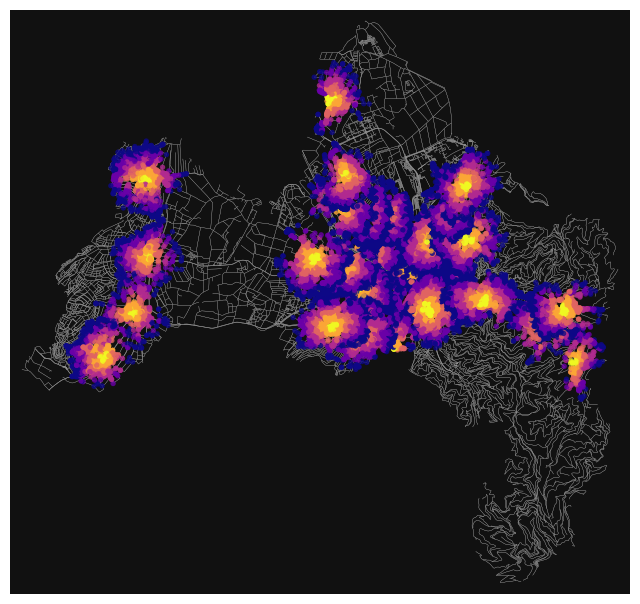

In [19]:
# color the nodes according to isochrone then plot the street network
node_colors = {}
for cur in (x["schools"]):
    if cur["city"]=="Freiburg im Breisgau":
        poi=ox.distance.nearest_nodes(G, cur["lng"],cur["lat"])
        for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
            subgraph = nx.ego_graph(G, poi, radius=trip_time, distance="time")
            for node in subgraph.nodes():
                col_old=0
                if node in node_colors:
                    col_old=sum(node_colors[node])
                if sum(color)>col_old:
                    node_colors[node] = color
                

nc = [node_colors[node] if node in node_colors else "none" for node in G.nodes()]
ns = [15 if node in node_colors else 0 for node in G.nodes()]
fig, ax = ox.plot_graph(
    G,
    node_color=nc,
    node_size=ns,
    node_alpha=0.8,
    edge_linewidth=0.2,
    edge_color="#999999",
    show=False, 
    close=False
)

In [18]:
tags = {'building': True}   

frg_buildings=ox.features_from_place(place,tags)

C:\Users\tstrub\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\osmnx\features.py:294: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  polygon = gdf_place["geometry"].unary_union


In [20]:
frg_buildings.plot(ax=ax,color='brown')


<Axes: >

<Axes: >

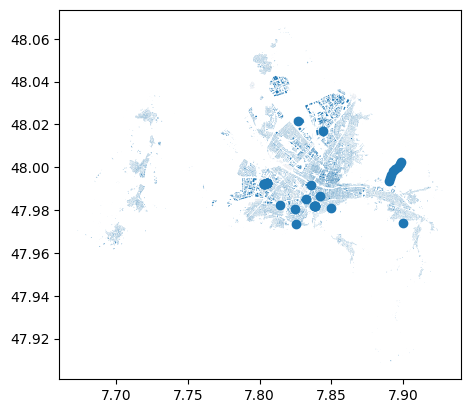

In [23]:
frg_buildings.plot()

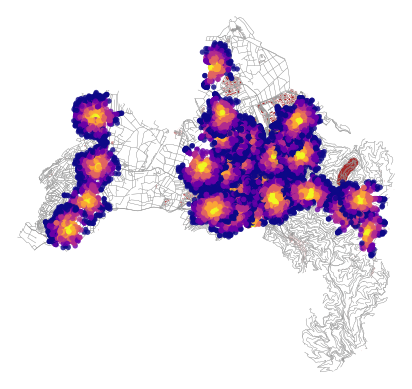

In [26]:
figu, axe = plt.subplots()
frg_buildings.plot(ax=axe,color='brown')
figure, axes = ox.plot_graph(
    G,
    ax=axe,
    node_color=nc,
    node_size=ns,
    node_alpha=0.8,
    edge_linewidth=0.2,
    edge_color="#999999",
    show=False, 
    close=False
)

In [ ]:


# get the building footprints in Macclesfield
place = {"name": "Landkreis Emmendingen", "state": "Baden Württemberg"}
#tags = {'building': 'school'}
#tags = {'school': 'primary'}
#gdf = ox.geometries_from_place(place, tags)

tags = {'building': True}   

lk_em_buildings=ox.features_from_place(place,tags)




C:\Users\tstrub\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\osmnx\features.py:294: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  polygon = gdf_place["geometry"].unary_union
C:\Users\tstrub\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\osmnx\_overpass.py:254: UserWarning: This area is 16 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


In [ ]:
1946117